# Credit EDA Case Study

#### This case study will give basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

#### This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
 
#### In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.



In [1]:
#Import the warnings.

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 300) # to display all the columns
pd.set_option('display.max_rows', 300) # to display all the rows
pd.set_option('display.width', 1000)

## Import the data from application_data

In [3]:
#Read the dataset of "application_data" in df_new dataframe
df_new=pd.read_csv("application_data.csv")

In [4]:
#Display the first 5 records
df_new.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
#Checking the shape of the dataframe
df_new.shape

(307511, 122)

In [6]:
#Checking the info of the dataframe
df_new.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [7]:
#Check datatypes of each field in dataframe
df_new.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


## Data Cleaning
### Treating null values

In [8]:
#Checking for percentage of missing values in each column
df_new.isnull().sum()/len(df_new)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [9]:
#Checking for columns having greater than 50% null value

emptycol=df_new.isnull().sum()/len(df_new)*100
emptycol=emptycol[emptycol.values>50.0]
print(emptycol)
len(emptycol)

OWN_CAR_AGE                 65.990810
EXT_SOURCE_1                56.381073
APARTMENTS_AVG              50.749729
BASEMENTAREA_AVG            58.515956
YEARS_BUILD_AVG             66.497784
COMMONAREA_AVG              69.872297
ELEVATORS_AVG               53.295980
ENTRANCES_AVG               50.348768
FLOORSMIN_AVG               67.848630
LANDAREA_AVG                59.376738
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAREA_AVG              50.193326
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAREA_AVG           55.179164
APARTMENTS_MODE             50.749729
BASEMENTAREA_MODE           58.515956
YEARS_BUILD_MODE            66.497784
COMMONAREA_MODE             69.872297
ELEVATORS_MODE              53.295980
ENTRANCES_MODE              50.348768
FLOORSMIN_MODE              67.848630
LANDAREA_MODE               59.376738
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAREA_MODE             50.193326
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAREA_MODE          55.179164
APARTMENTS_M

41

In [10]:
#Removing all columns having more than 50% null values
emptycol = list(emptycol[emptycol.values>=50.0].index)
df_new.drop(labels=emptycol,axis=1,inplace=True)
print(len(emptycol))

41


In [11]:
#Checking shape of the dataframe after removing columns
df_new.shape

(307511, 81)

In [12]:
#Checking the columns having less null percentage
df_new.isnull().sum()/len(df_new)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

**Inference:**  
We can see that we have some null value in the columns. All these values are less than 50%.

### Analysis of columns by checking less than 19% null value and checking if replacement is required or not.

In [13]:
#Checking for coloums having less than 19% null value
emptycol=df_new.isnull().sum()/len(df_new)*100
emptycol=emptycol[emptycol.values<19.0]
print(emptycol)
len(emptycol)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

71

### 1. Analysis of AMT_ANNUITY column.

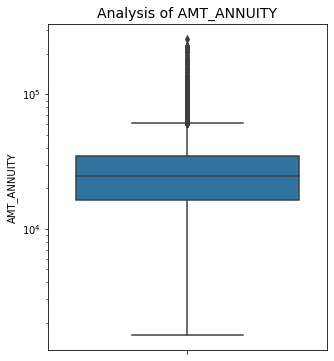

In [14]:
#Plotting the values of AMT_ANNUITY column using box plot to detect outliers
plt.figure(figsize=(5,6))
sns.boxplot(y=df_new['AMT_ANNUITY'])
plt.yscale('log') #to display matplotlib.pyplot with a logarithmic y-axis scale.
plt.title("Analysis of AMT_ANNUITY",fontsize=14)
plt.show()

In [15]:
#Describe the info of column AMT_ANNUITY
print(df_new['AMT_ANNUITY'].mean())
print(df_new['AMT_ANNUITY'].median())
print(df_new['AMT_ANNUITY'].describe())

27108.573909183444
24903.0
count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


**Inference:**   
From the Box Plot we can see that there are sever outliners and the difference between max and min is quite severe. So we are taking median value to replace those null values.

In [16]:
#Verifying the count of missing value for AMT_ANNUITY column
df_new.AMT_ANNUITY.isnull().sum()

12

In [17]:
#Filling missing values in column AMT_ANNUITY with median
fillMissingVal=df_new['AMT_ANNUITY'].median()
df_new['AMT_ANNUITY'].fillna(value = fillMissingVal, inplace =True)

In [18]:
#Checking the count of missing value for AMT_ANNUITY column
df_new.AMT_ANNUITY.isnull().sum()

0

In [19]:
#Checking the columns having less null percentage
df_new.isnull().sum()/len(df_new)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.000000
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

### 2. Analysis of CNT_FAM_MEMBERS

In [20]:
#Checking count of family members
df_new['CNT_FAM_MEMBERS'].value_counts(dropna=False)

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
16.0         2
14.0         2
20.0         2
12.0         2
NaN          2
15.0         1
13.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

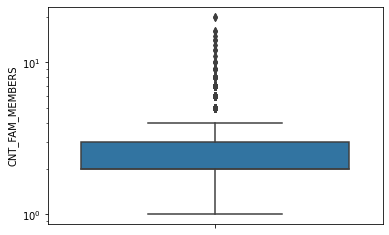

In [21]:
#Plotting the values of CNT_FAM_MEMBERS column using box plot to detect outliers
sns.boxplot(y=df_new['CNT_FAM_MEMBERS'])
plt.yscale('log')
plt.show()

In [22]:
#Describe the info of column CNT_FAM_MEMBERS
print(df_new['CNT_FAM_MEMBERS'].mean())
print(df_new['CNT_FAM_MEMBERS'].median())
print(df_new['CNT_FAM_MEMBERS'].describe())

2.152665450442101
2.0
count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


In [23]:
#Filling missing values with median
fillMissingVal=df_new['CNT_FAM_MEMBERS'].median()
df_new['CNT_FAM_MEMBERS'].fillna(value = fillMissingVal, inplace =True)

In [24]:
#Checking the count of missing value for CNT_FAM_MEMBERS column
df_new.CNT_FAM_MEMBERS.isnull().sum()

0

In [25]:
#Checking the columns having less null percentage
df_new.isnull().sum()/len(df_new)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.000000
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

**Inference:**  
From the Box Plot we can see that there are severe outliers and there is quite a difference between 75% and max. So we are taking median value to replace those null values.

### 3. Analysis of Code gender

In [26]:
#Checking count of each gender M/F
df_new['CODE_GENDER'].value_counts(dropna=False)

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

**Inference:**  
As we can see that Female(F) is having the majority and only 4 rows are having XNA values. So, there wont be any major impact in the dataset if we can update those columns with Gender 'F'.

In [27]:
#Replace XNA with F and checking count of each gender M/F
df_new.loc[df_new['CODE_GENDER']=='XNA','CODE_GENDER']='F'
df_new['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

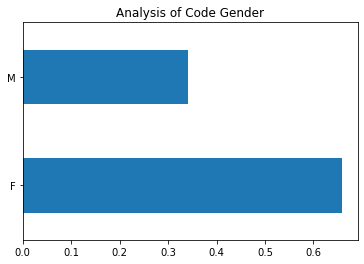

In [28]:
#Plot the bar graph of CODE_GENDER
df_new['CODE_GENDER'].value_counts(normalize=True).plot.barh(title='Analysis of Code Gender')
plt.show()

### 4. Analysis of ORGANIZATION_TYPE

In [29]:
#Checking count of each type of organization where client works
df_new['ORGANIZATION_TYPE'].value_counts(dropna=False)

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [30]:
#Describe the info of column ORGANIZATION_TYPE
print(df_new['ORGANIZATION_TYPE'].mode())
print(df_new['ORGANIZATION_TYPE'].describe())

0    Business Entity Type 3
dtype: object
count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object


**Inference:**   
There are 55374 rows wit XNA value which is 18% of the total count. So we can discard them.

### 5. Analysis of AMT_GOODS_PRICE

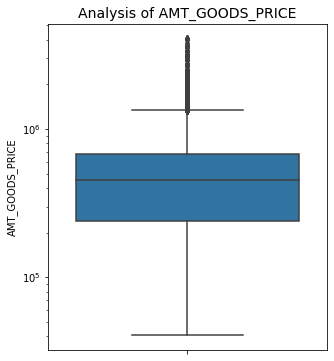

In [31]:
#Box plotting the values of AMT_GOODS_PRICE
plt.figure(figsize=(5,6))
sns.boxplot(y=df_new['AMT_GOODS_PRICE'])
plt.yscale('log') #to display matplotlib.pyplot with a logarithmic y-axis scale.
plt.title("Analysis of AMT_GOODS_PRICE",fontsize=14)
plt.show()

In [32]:
#Describe the info of column AMT_GOODS_PRICE
print(df_new['AMT_GOODS_PRICE'].describe())
print(df_new['AMT_GOODS_PRICE'].median())
print(df_new['AMT_GOODS_PRICE'].mean())
print(df_new['AMT_GOODS_PRICE'].max())
print(df_new['AMT_GOODS_PRICE'].min())

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64
450000.0
538396.2074288895
4050000.0
40500.0


**Inference:**  
As we can see we are not getting any clear understanding of the data, so we would keep the outliers values.

### 6. Analysis of AMT_REQ_CREDIT_BUREAU_DAY

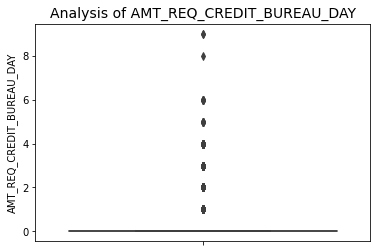

In [33]:
#Box plotting the values of AMT_REQ_CREDIT_BUREAU_DAY
sns.boxplot(y=df_new['AMT_REQ_CREDIT_BUREAU_DAY'])
plt.title("Analysis of AMT_REQ_CREDIT_BUREAU_DAY",fontsize=14)
plt.show()

In [34]:
#Describe the info of column AMT_REQ_CREDIT_BUREAU_DAY
print(df_new['AMT_REQ_CREDIT_BUREAU_DAY'].describe())

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


**Inference**   
As we can see the numerical column AMT_REQ_CREDIT_BUREAU_DAY has outliers so they need to be removed or capped. Also for missing values fillup we need to use the median in this case.

## Handling Outliers

In [35]:
#Removing outliers for the column AMT_REQ_CREDIT_BUREAU_DAY
col_of_outliers=['AMT_REQ_CREDIT_BUREAU_DAY']
for col in col_of_outliers:
    percentiles = df_new[col].quantile([0.01,0.99]).values
    df_new[col][df_new[col] <= percentiles[0]] = percentiles[0]
    df_new[col][df_new[col] >= percentiles[1]] = percentiles[1]

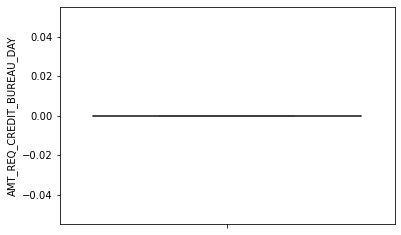

In [36]:
#Box plotting the values of AMT_REQ_CREDIT_BUREAU_DAY
sns.boxplot(y=df_new['AMT_REQ_CREDIT_BUREAU_DAY'])
plt.show()

### Changing the datatype for the required columns

In [37]:
df_new.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [38]:
#Casting all variable into numeric in the dataset
numeric_cols=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

df_new[numeric_cols]=df_new[numeric_cols].apply(pd.to_numeric)
df_new.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Binning

In [39]:
#Binning DAYS_BIRTH
abs(df_new['DAYS_BIRTH']).quantile([0,0.1,0.3,0.6,0.8,1])

0.0     7489.0
0.1    10284.0
0.3    13140.0
0.6    17220.0
0.8    20474.0
1.0    25229.0
Name: DAYS_BIRTH, dtype: float64

In [40]:
#Creating a column AGE using DAYS_BIRTH
df_new['AGE']=abs(df_new['DAYS_BIRTH'])//365.25

In [41]:
## Since the AGE varies from 20 to 69, we can create bins of 5 years starting from 20 to 70
df_new['AGE_GROUP'] = pd.cut(df_new['AGE'],bins=np.arange(20,71,5))

In [42]:
#Creating a column YEARS_EMPLOYED using DAYS_EMPLOYED
df_new['YEARS_EMPLOYED']=abs(df_new['DAYS_EMPLOYED'])//365.25

In [43]:
df_new['YEARS_EMPLOYED'].describe()

count    307511.000000
mean        184.837329
std         381.589859
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max         999.000000
Name: YEARS_EMPLOYED, dtype: float64

In [44]:
'''Since the experience varies from 0 to 30 years and above and we have have an outlier which is 999 but it just 
have a small significance so we did not remove it, so creating bins for Years Employed'''

bins = [0,1,5,10,20,30,1000]
slot = ['0-1', '1-5',
       '5-10','10-20','20-30','30 and above']

df_new['YEARS_EMPLOYED_GROUP']=pd.cut(df_new['YEARS_EMPLOYED'],bins,labels=slot)

In [45]:
#Creating bins for income amount
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df_new['AMT_INCOME_RANGE']=pd.cut(df_new['AMT_INCOME_TOTAL'],bins,labels=slot)

In [46]:
#Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

df_new['AMT_CREDIT_RANGE']=pd.cut(df_new['AMT_CREDIT'],bins=bins,labels=slots)

In [47]:
## CREDIT_INCOME_RATIO is Credit to Income comparison
df_new['CREDIT_INCOME_RATIO']=round((df_new['AMT_CREDIT']/df_new['AMT_INCOME_TOTAL']))

### Changing to large bins for ease of comparision

In [48]:
#Creating bins for income amount with huge gaps
bins = [0,100000,200000,300000,400000,500000,10000000000]
slot = ['0-100000','100000-200000',
       '200000-300000','300000-400000','400000-500000','500000 and above']

df_new['AMT_INCOME_RANGE2']=pd.cut(df_new['AMT_INCOME_TOTAL'],bins,labels=slot)

In [49]:
#Creating bins for Credit amount with huge gaps

bins = [0,200000,400000,600000,800000,1000000000]
slots = ['0-200000','200000-400000','400000-600000','600000-800000',
        '800000 and above']

df_new['AMT_CREDIT_RANGE2']=pd.cut(df_new['AMT_CREDIT'],bins=bins,labels=slots)

### Calculating the Imbalance

In [50]:
#Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0 = df_new.loc[df_new["TARGET"]==0]
target1 = df_new.loc[df_new["TARGET"]==1]

In [51]:
#Calculating Imbalance 
imbalance=round(len(target0)/len(target1),2)
imbalance

11.39

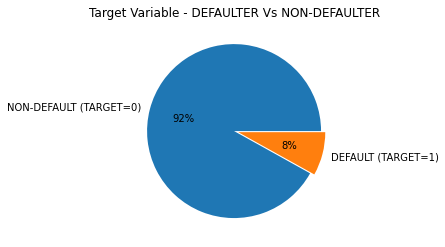

In [52]:
plt.pie(df_new['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULT (TARGET=0)','DEFAULT (TARGET=1)'],explode=(0,0.05),autopct='%1.f%%')
plt.title('Target Variable - DEFAULTER Vs NON-DEFAULTER')
plt.show()

**Inference:**  
8% of total population defaulted.


## Univariate analysis for categories

In [53]:
#Reusable ploting function

def plotfunc(df,col,title,hue = None):
    
    sns.set_style('darkgrid')
    sns.set_context('poster')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 18
    plt.rcParams['axes.titlepad'] = 30
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.yscale('log')
    plt.title(title,fontsize=14)
    ax = sns.countplot(data=df, x=col, hue=hue, palette='mako') 
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    plt.show()

In [54]:
# Function to count plot for categorical variables
def plotcat(var):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.countplot(x=var, data=target0,ax=ax1, palette='rocket')
    ax1.set_ylabel('Total Counts')
    ax1.set_title(f'Distribution of {var} for Non-Defaulters',fontsize=15)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(target0))*100), (p.get_x()+0.5, p.get_height()+100))
        
    sns.countplot(x=var, data=target1,ax=ax2, palette='mako')
    ax2.set_ylabel('Total Counts')
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize=15)    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(target1))*100), (p.get_x()+0.1, p.get_height()+50))
    
    plt.show()

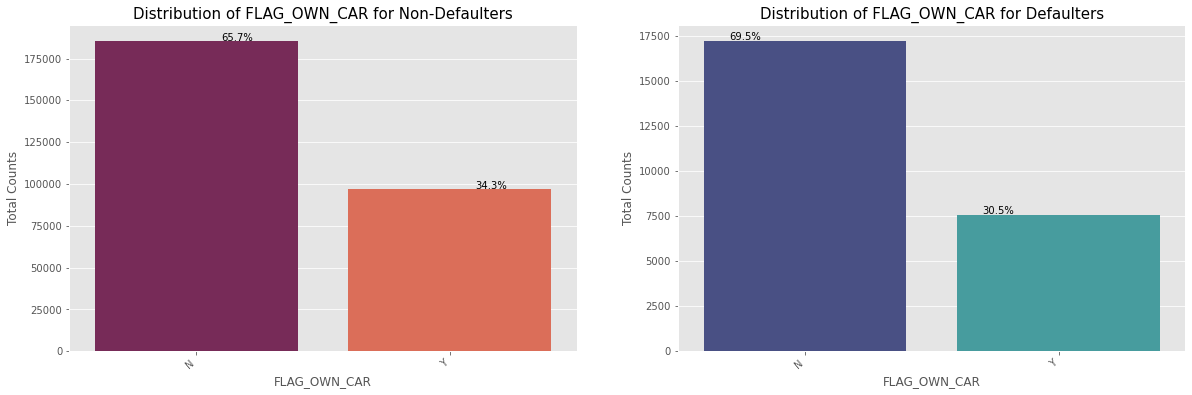

In [55]:
plotcat('FLAG_OWN_CAR')

Note : Here Y is Yes and N is No in both histograms.    
There is no significance differences in histograms.

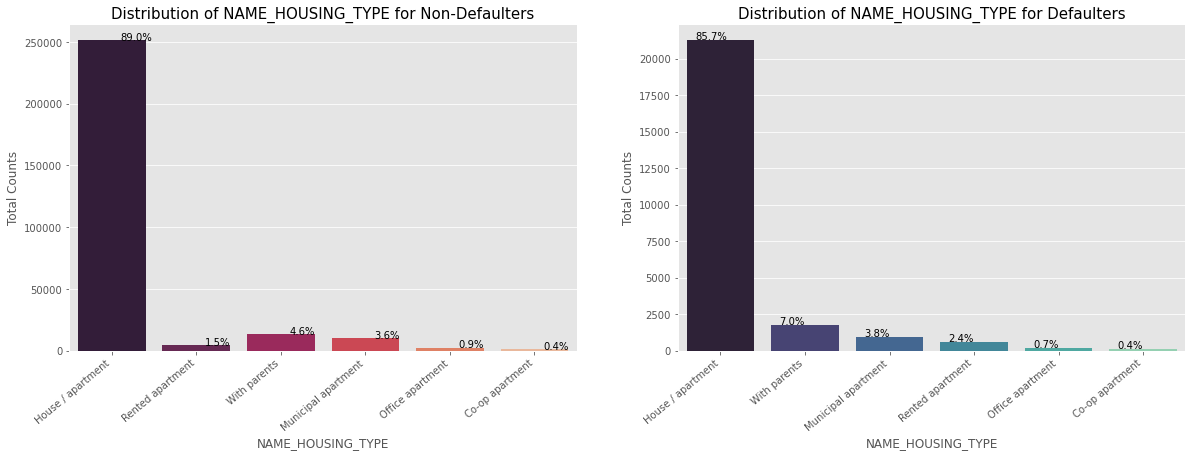

In [56]:
plotcat('NAME_HOUSING_TYPE')

**Inferences:**   
Both Graphs are fairly similar to get any inference.

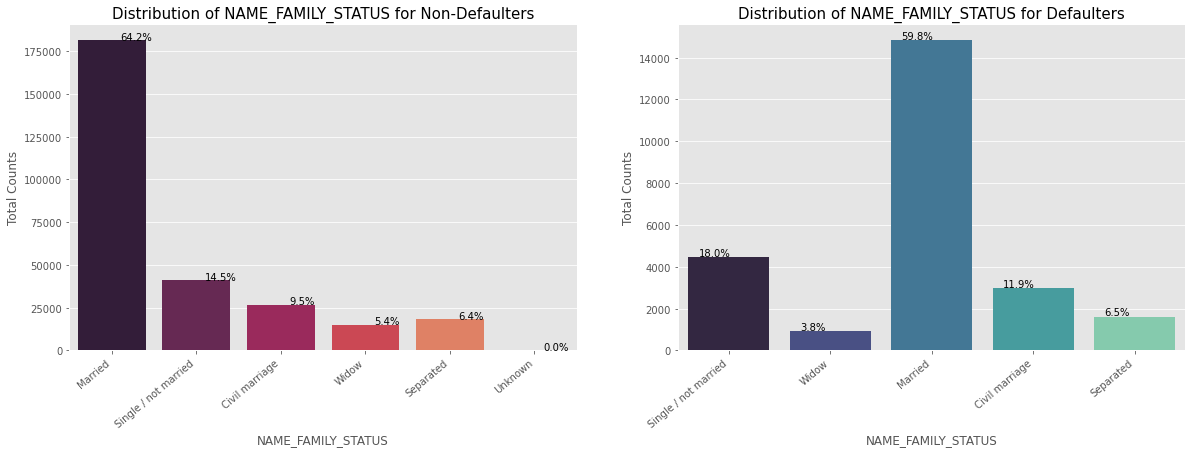

In [57]:
plotcat('NAME_FAMILY_STATUS')

**Inferences:**   
In both cases, Married cases take the most share. This might be because of their major presence in the dataset and doesn't really make any statement. Though, Unmarried and Civil married gain higher percentages in defaulters.

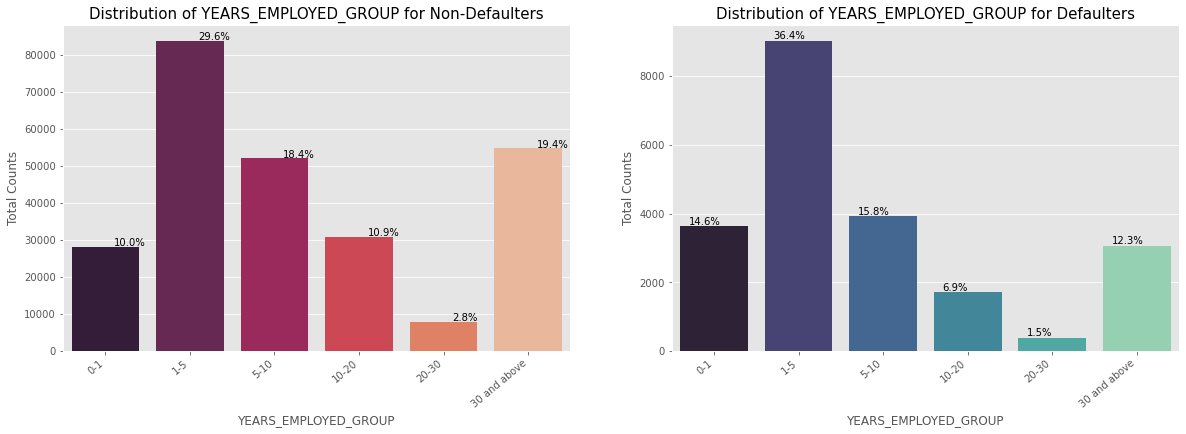

In [58]:
plotcat('YEARS_EMPLOYED_GROUP')

**Inferences:**   
Only 0-5 years bars experienced an increase in defaulters. This tells us that people with less work experience are more likely to default.

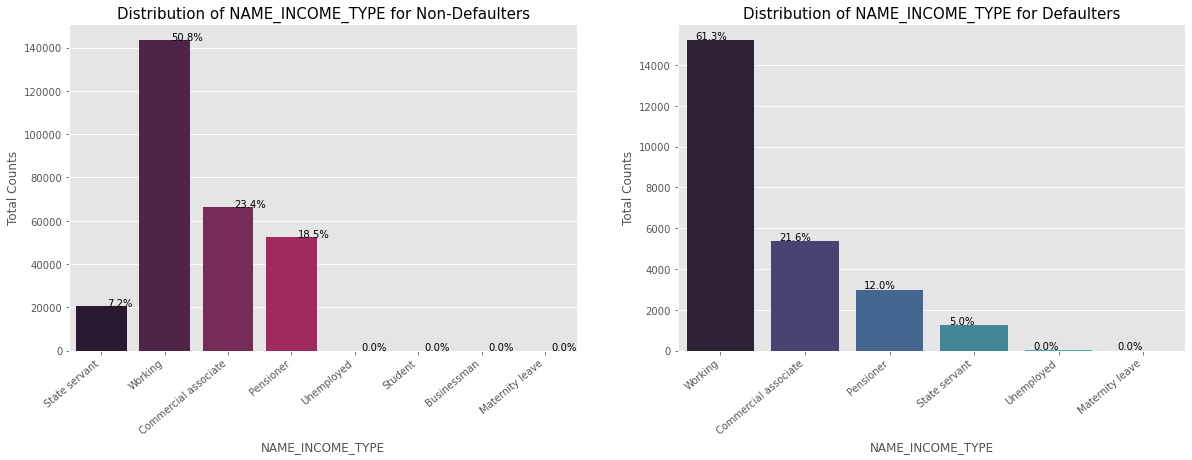

In [59]:
plotcat('NAME_INCOME_TYPE')

**Inferences:**   
Businessmen dropped completely in defaulters. This tells us that those who had business didn't default at all.

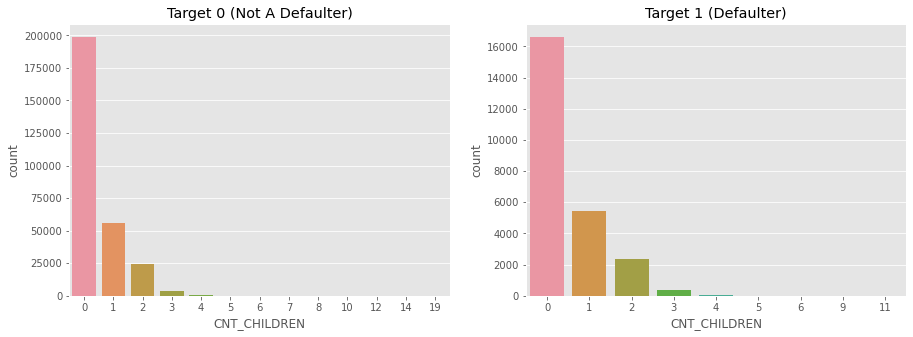

In [60]:
#Plotting for CNT_CHILDREN for target0 and target1
fig, ax =plt.subplots(1,2,figsize=(15,5))
sns.countplot(target0['CNT_CHILDREN'], ax=ax[0]).set_title('Target 0 (Not A Defaulter)')
sns.countplot(target1['CNT_CHILDREN'], ax=ax[1]).set_title('Target 1 (Defaulter)')
fig.show()

**Inference:**
<br>Both graphs are fairly similar to get any inference.

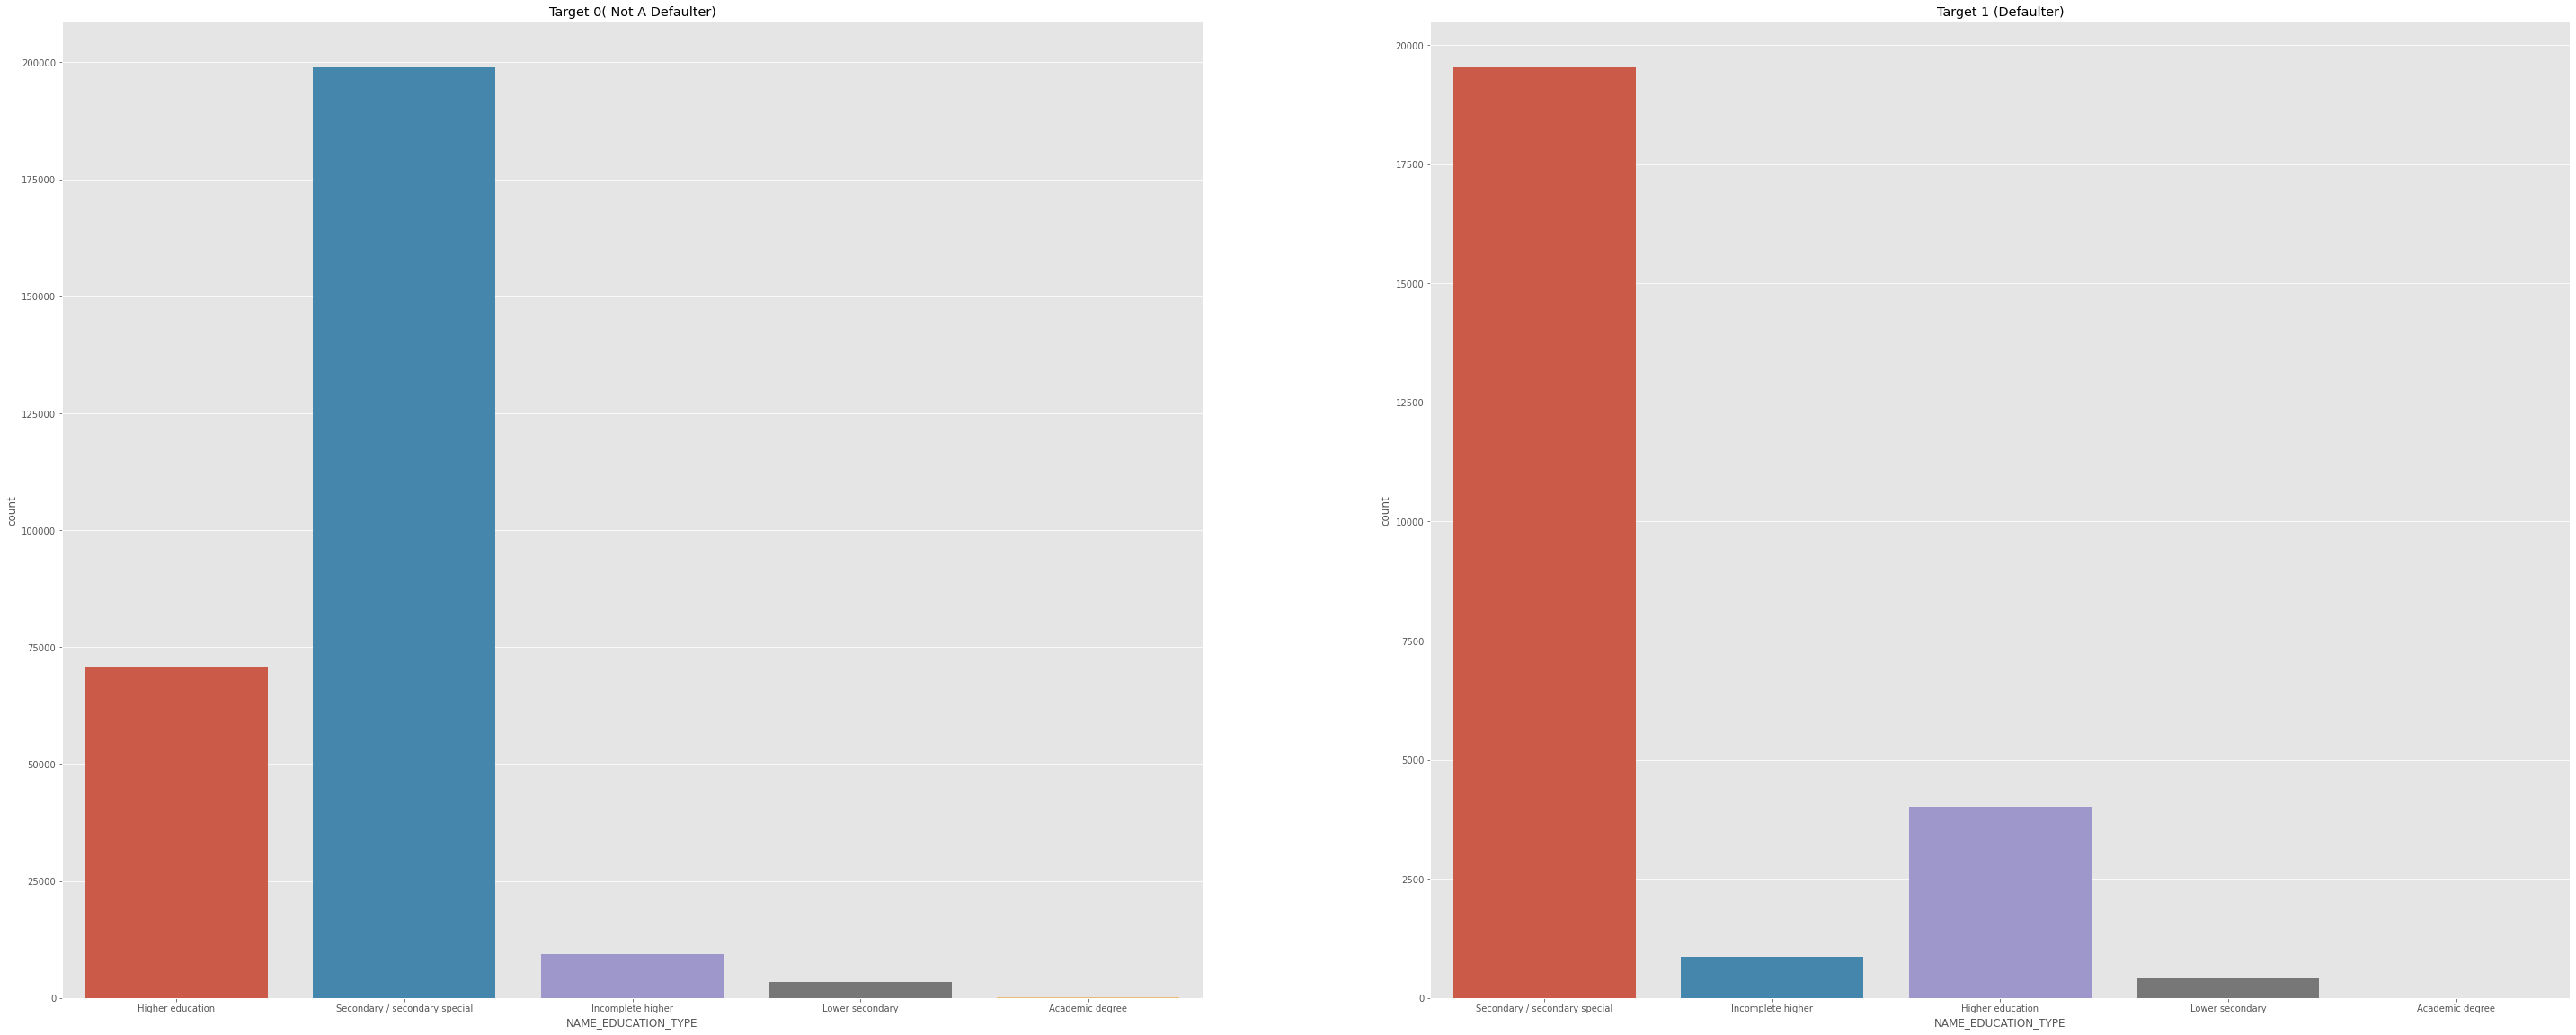

In [61]:
#Plotting for NAME_EDUCATION_TYPE for target0 and target1
fig, ax=plt.subplots(1,2,figsize=(50,20))
sns.countplot(target0['NAME_EDUCATION_TYPE'], ax=ax[0]).set_title('Target 0( Not A Defaulter)')
sns.countplot(target1['NAME_EDUCATION_TYPE'], ax=ax[1]).set_title('Target 1 (Defaulter)')
fig.show()

**Inference:**   
Both Graphs are fairly similar to get any inference.

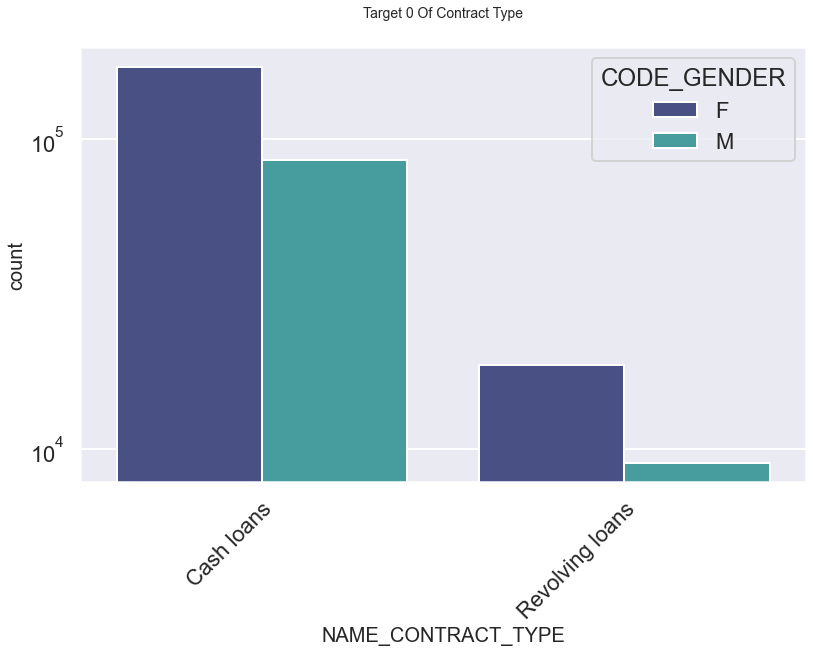

In [62]:
#Plotting for NAME_CONTRACT_TYPE for target0
plotfunc(target0,col='NAME_CONTRACT_TYPE',title='Target 0 Of Contract Type',hue='CODE_GENDER')

**Inference:**   
 Cash Loan contracts have a higher number of credit than revolving loan contracts count of female is more.

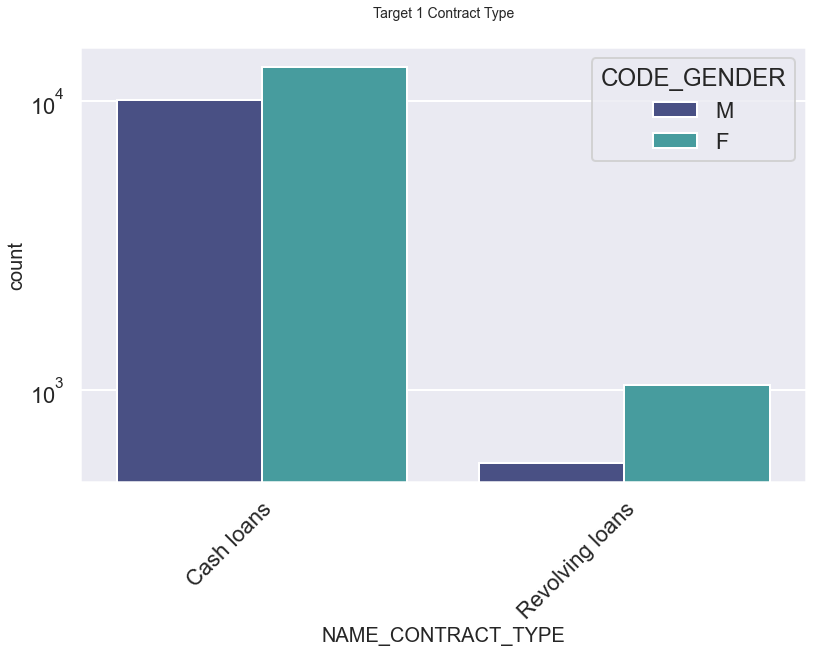

In [63]:
#Plotting for NAME_CONTRACT_TYPE for target1
plotfunc(target1,col='NAME_CONTRACT_TYPE',title='Target 1 Contract Type',hue='CODE_GENDER')

**Inferences:**

 Cash Loan contracts have a higher number of credit than revolving loan contracts.   
 There are mainly female revolving loans.

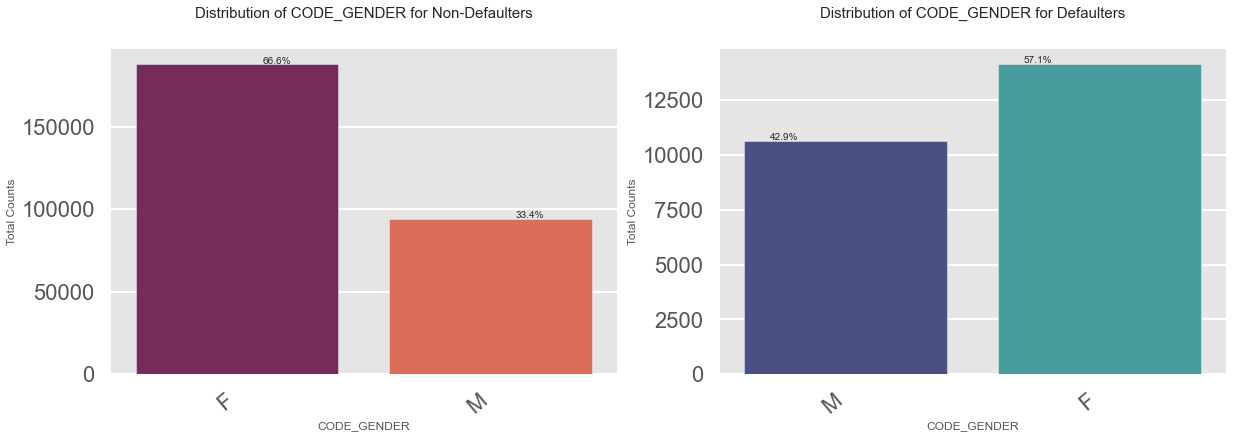

In [64]:
plotcat('CODE_GENDER')

**Inference:**   
Females took more loan in comparision to Males.

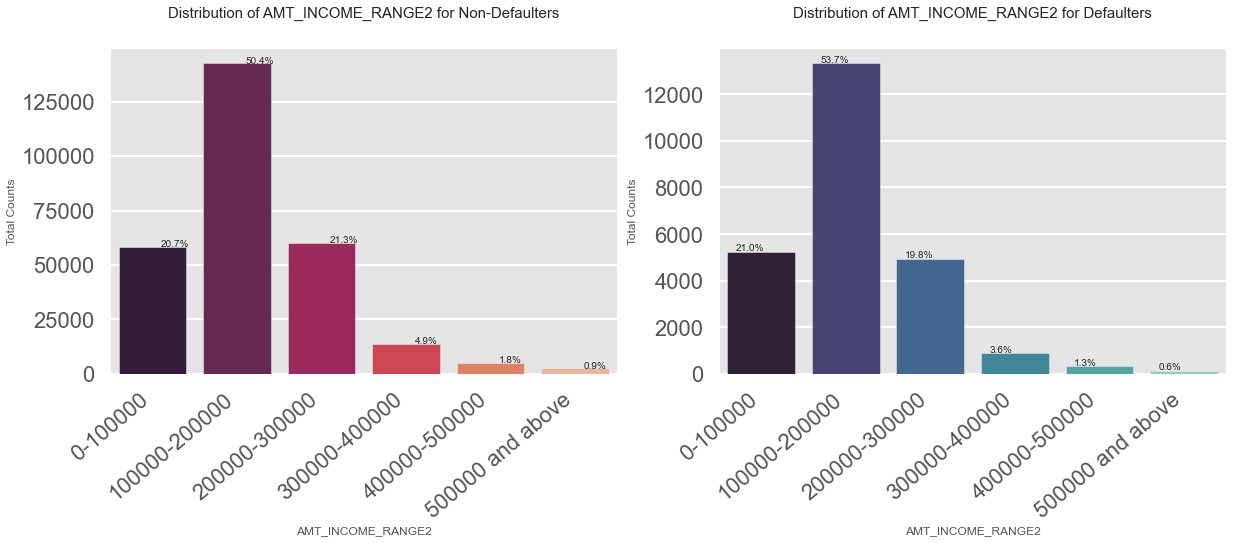

In [65]:
plotcat('AMT_INCOME_RANGE2')

**Inference:**   
Both graphs are fairly similar to get any inference.

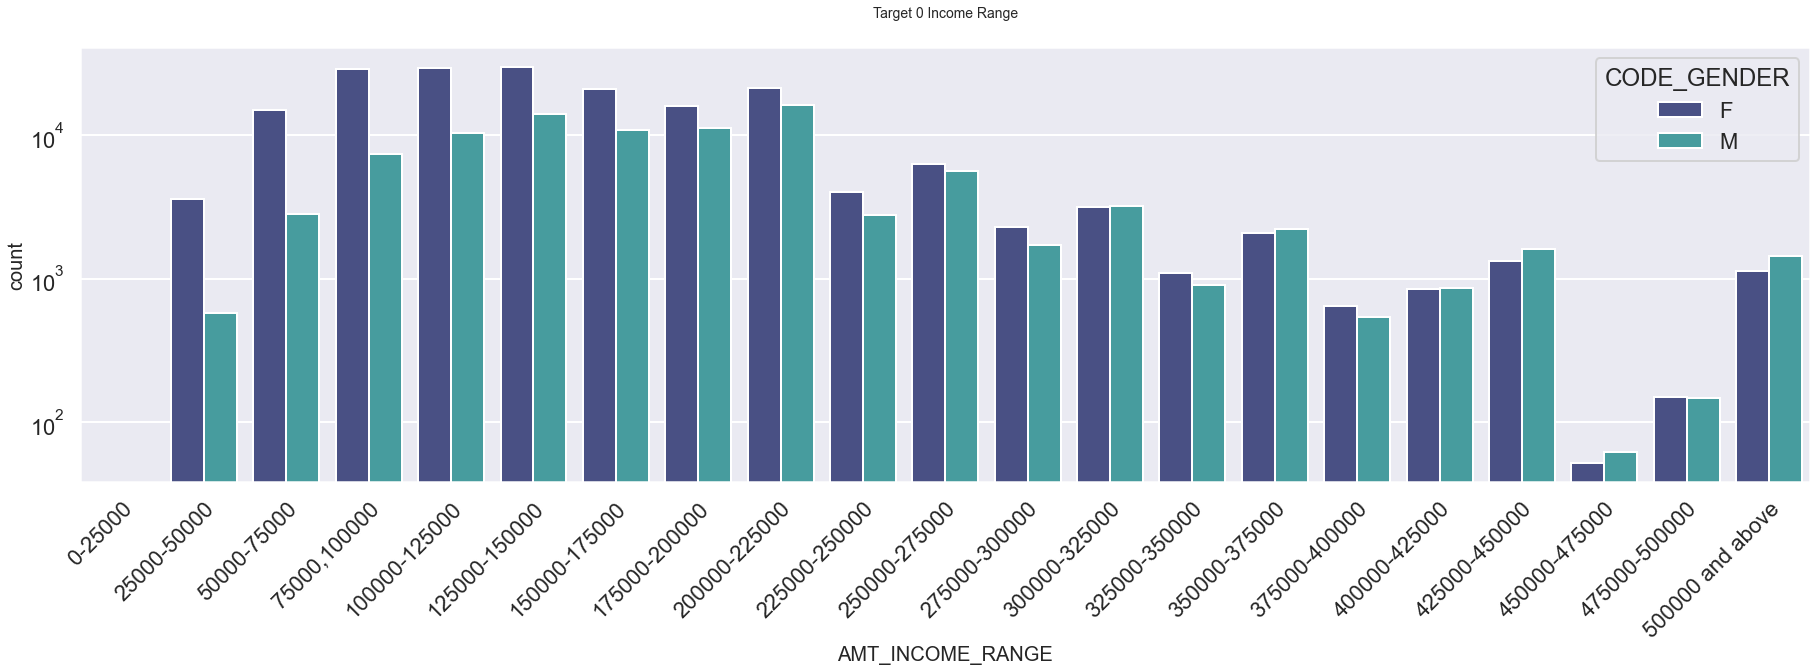

In [66]:
#Plotting for income range for target0
plotfunc(target0,col='AMT_INCOME_RANGE',title='Target 0 Income Range',hue='CODE_GENDER')

**Inferences:**   
1. Females with less income range are taking more loans in comparision of Males.
2. Femailes with higher income range are taking less loans in comparision of Males.


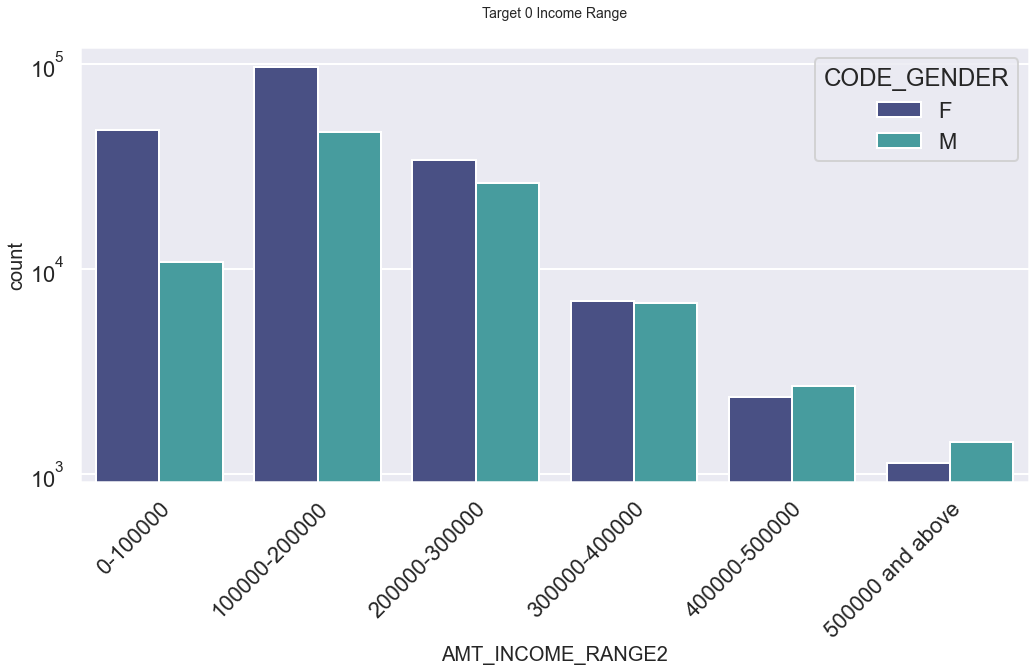

In [67]:
#Plotting for income range for target0 with huge bins
plotfunc(target0,col='AMT_INCOME_RANGE2',title='Target 0 Income Range',hue='CODE_GENDER')

 **Inferences:**   
1. Females with lower income tend to apply for loans than male counterparts.   
2. Males with higher income take more loans than Females**

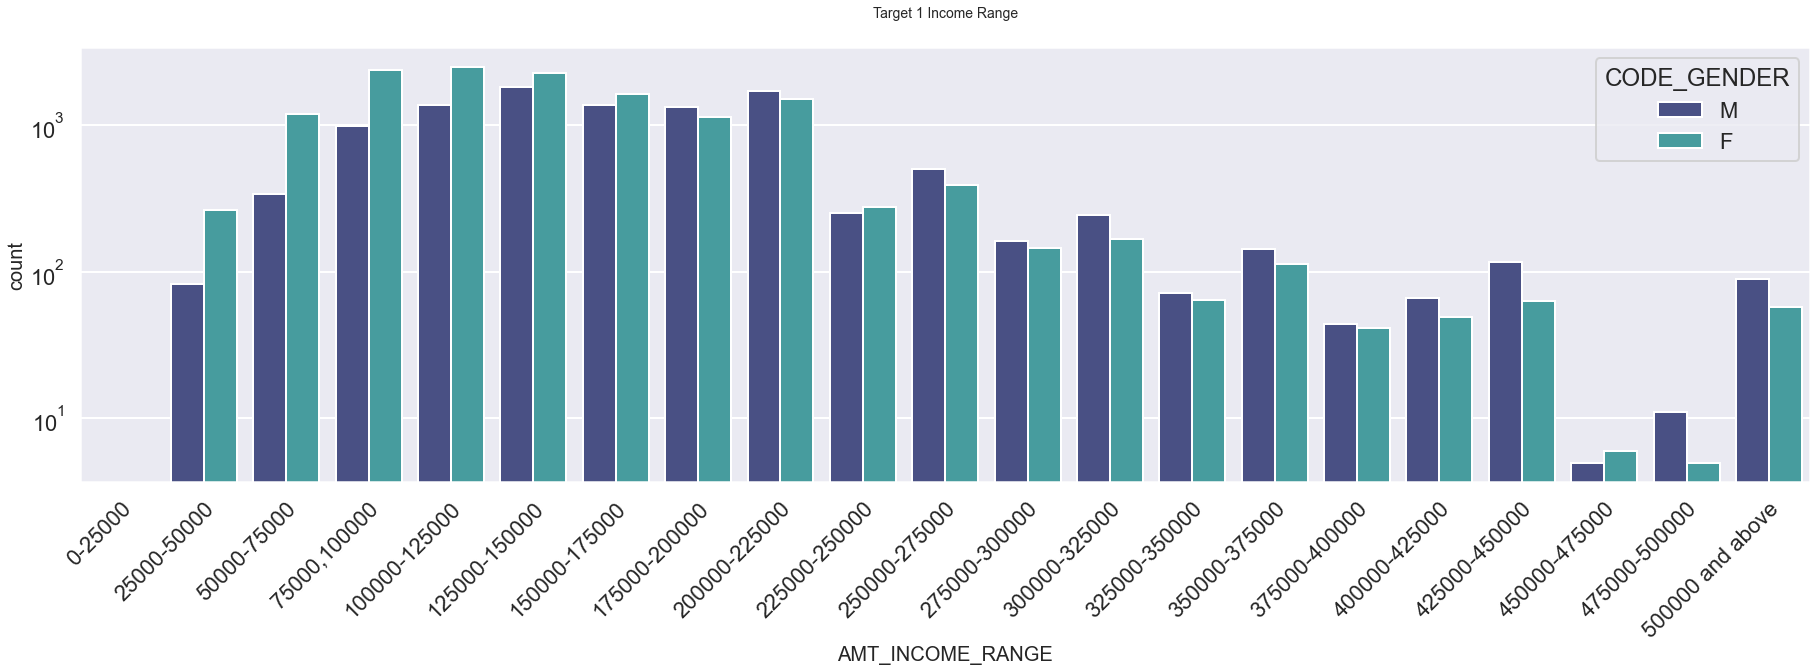

In [68]:
#Plotting for income range for target1
plotfunc(target1,col='AMT_INCOME_RANGE',title='Target 1 Income Range',hue='CODE_GENDER')

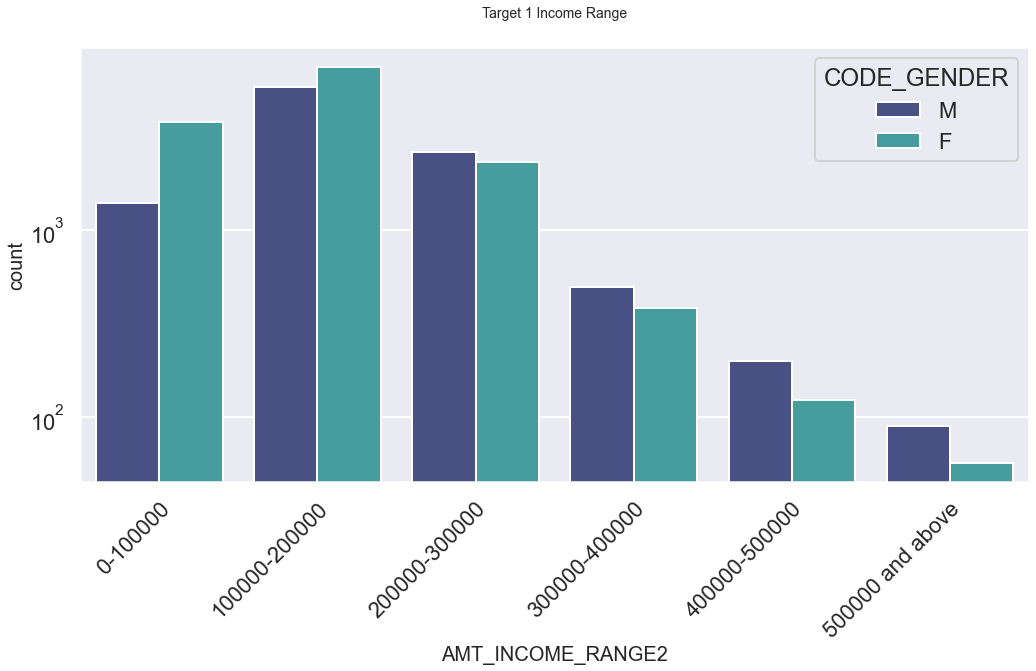

In [69]:
#Plotting for income range for target1 with huge bins
plotfunc(target1,col='AMT_INCOME_RANGE2',title='Target 1 Income Range',hue='CODE_GENDER')

**Inferences:**   
1. Male counts are higher than female.   
2. This graph show that males are more than female in having loan "From 200k above".   
3. Higher income males default more than females.   
4. Lower Income Women are more likely to default than males.

## Continuous Univariate Analysis

In [70]:
# function to dist plot for continuous variables
def plotdist(var):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    
    sns.distplot(a=target0[var],ax=ax1)

    ax1.set_title(f'Distribution of {var} for Non-Defaulters',fontsize=15)
            
    sns.distplot(a=target1[var],ax=ax2)
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize=15)    
        
    plt.show()

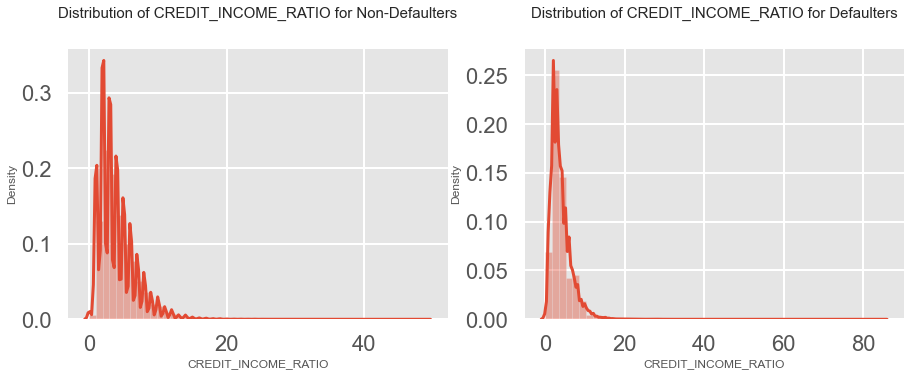

In [71]:
plotdist('CREDIT_INCOME_RATIO')

CREDIT_INCOME_RATIO is Credit to Income comparison

**Inference:**   
The comparison here tells us that all Non-Defaulters lie below 50 ratio which can tell us that it isnt safe to cross that mark.

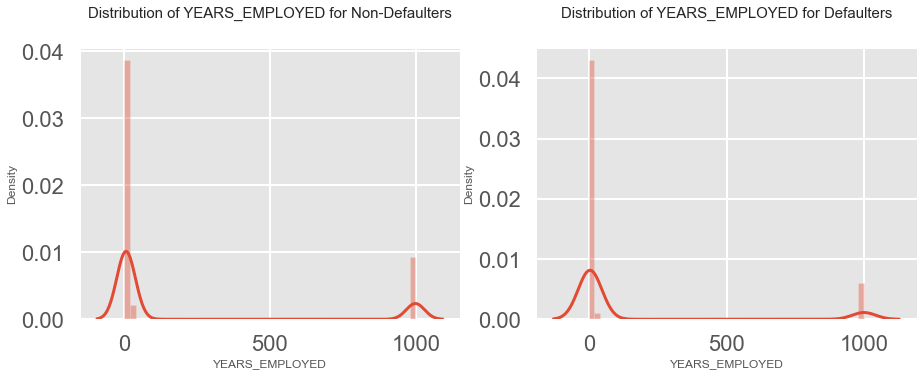

In [72]:
plotdist('YEARS_EMPLOYED')

In [73]:
target1['YEARS_EMPLOYED_GROUP'].value_counts()

1-5             9032
5-10            3929
0-1             3632
30 and above    3065
10-20           1714
20-30            383
Name: YEARS_EMPLOYED_GROUP, dtype: int64

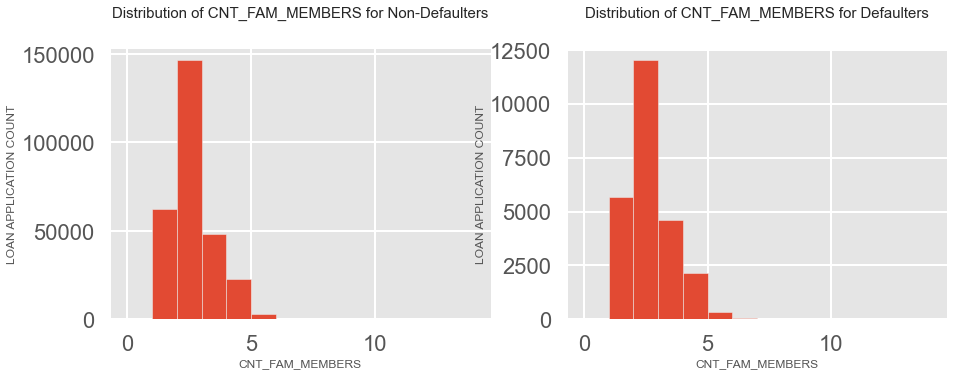

In [74]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
target0['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title('Distribution of CNT_FAM_MEMBERS for Non-Defaulters',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')

plt.subplot(1, 2, 2)
target1['CNT_FAM_MEMBERS'].plot.hist(bins=range(15))
plt.title(f'Distribution of CNT_FAM_MEMBERS for Defaulters',fontsize=15)
plt.xlabel('CNT_FAM_MEMBERS')
plt.ylabel('LOAN APPLICATION COUNT')  

plt.show()


**Inference:**   
A family of two members takes more loans than other families.

## Bivariate Analysis

### Analysing correlation for numerical columns for both Target 0 and Target1

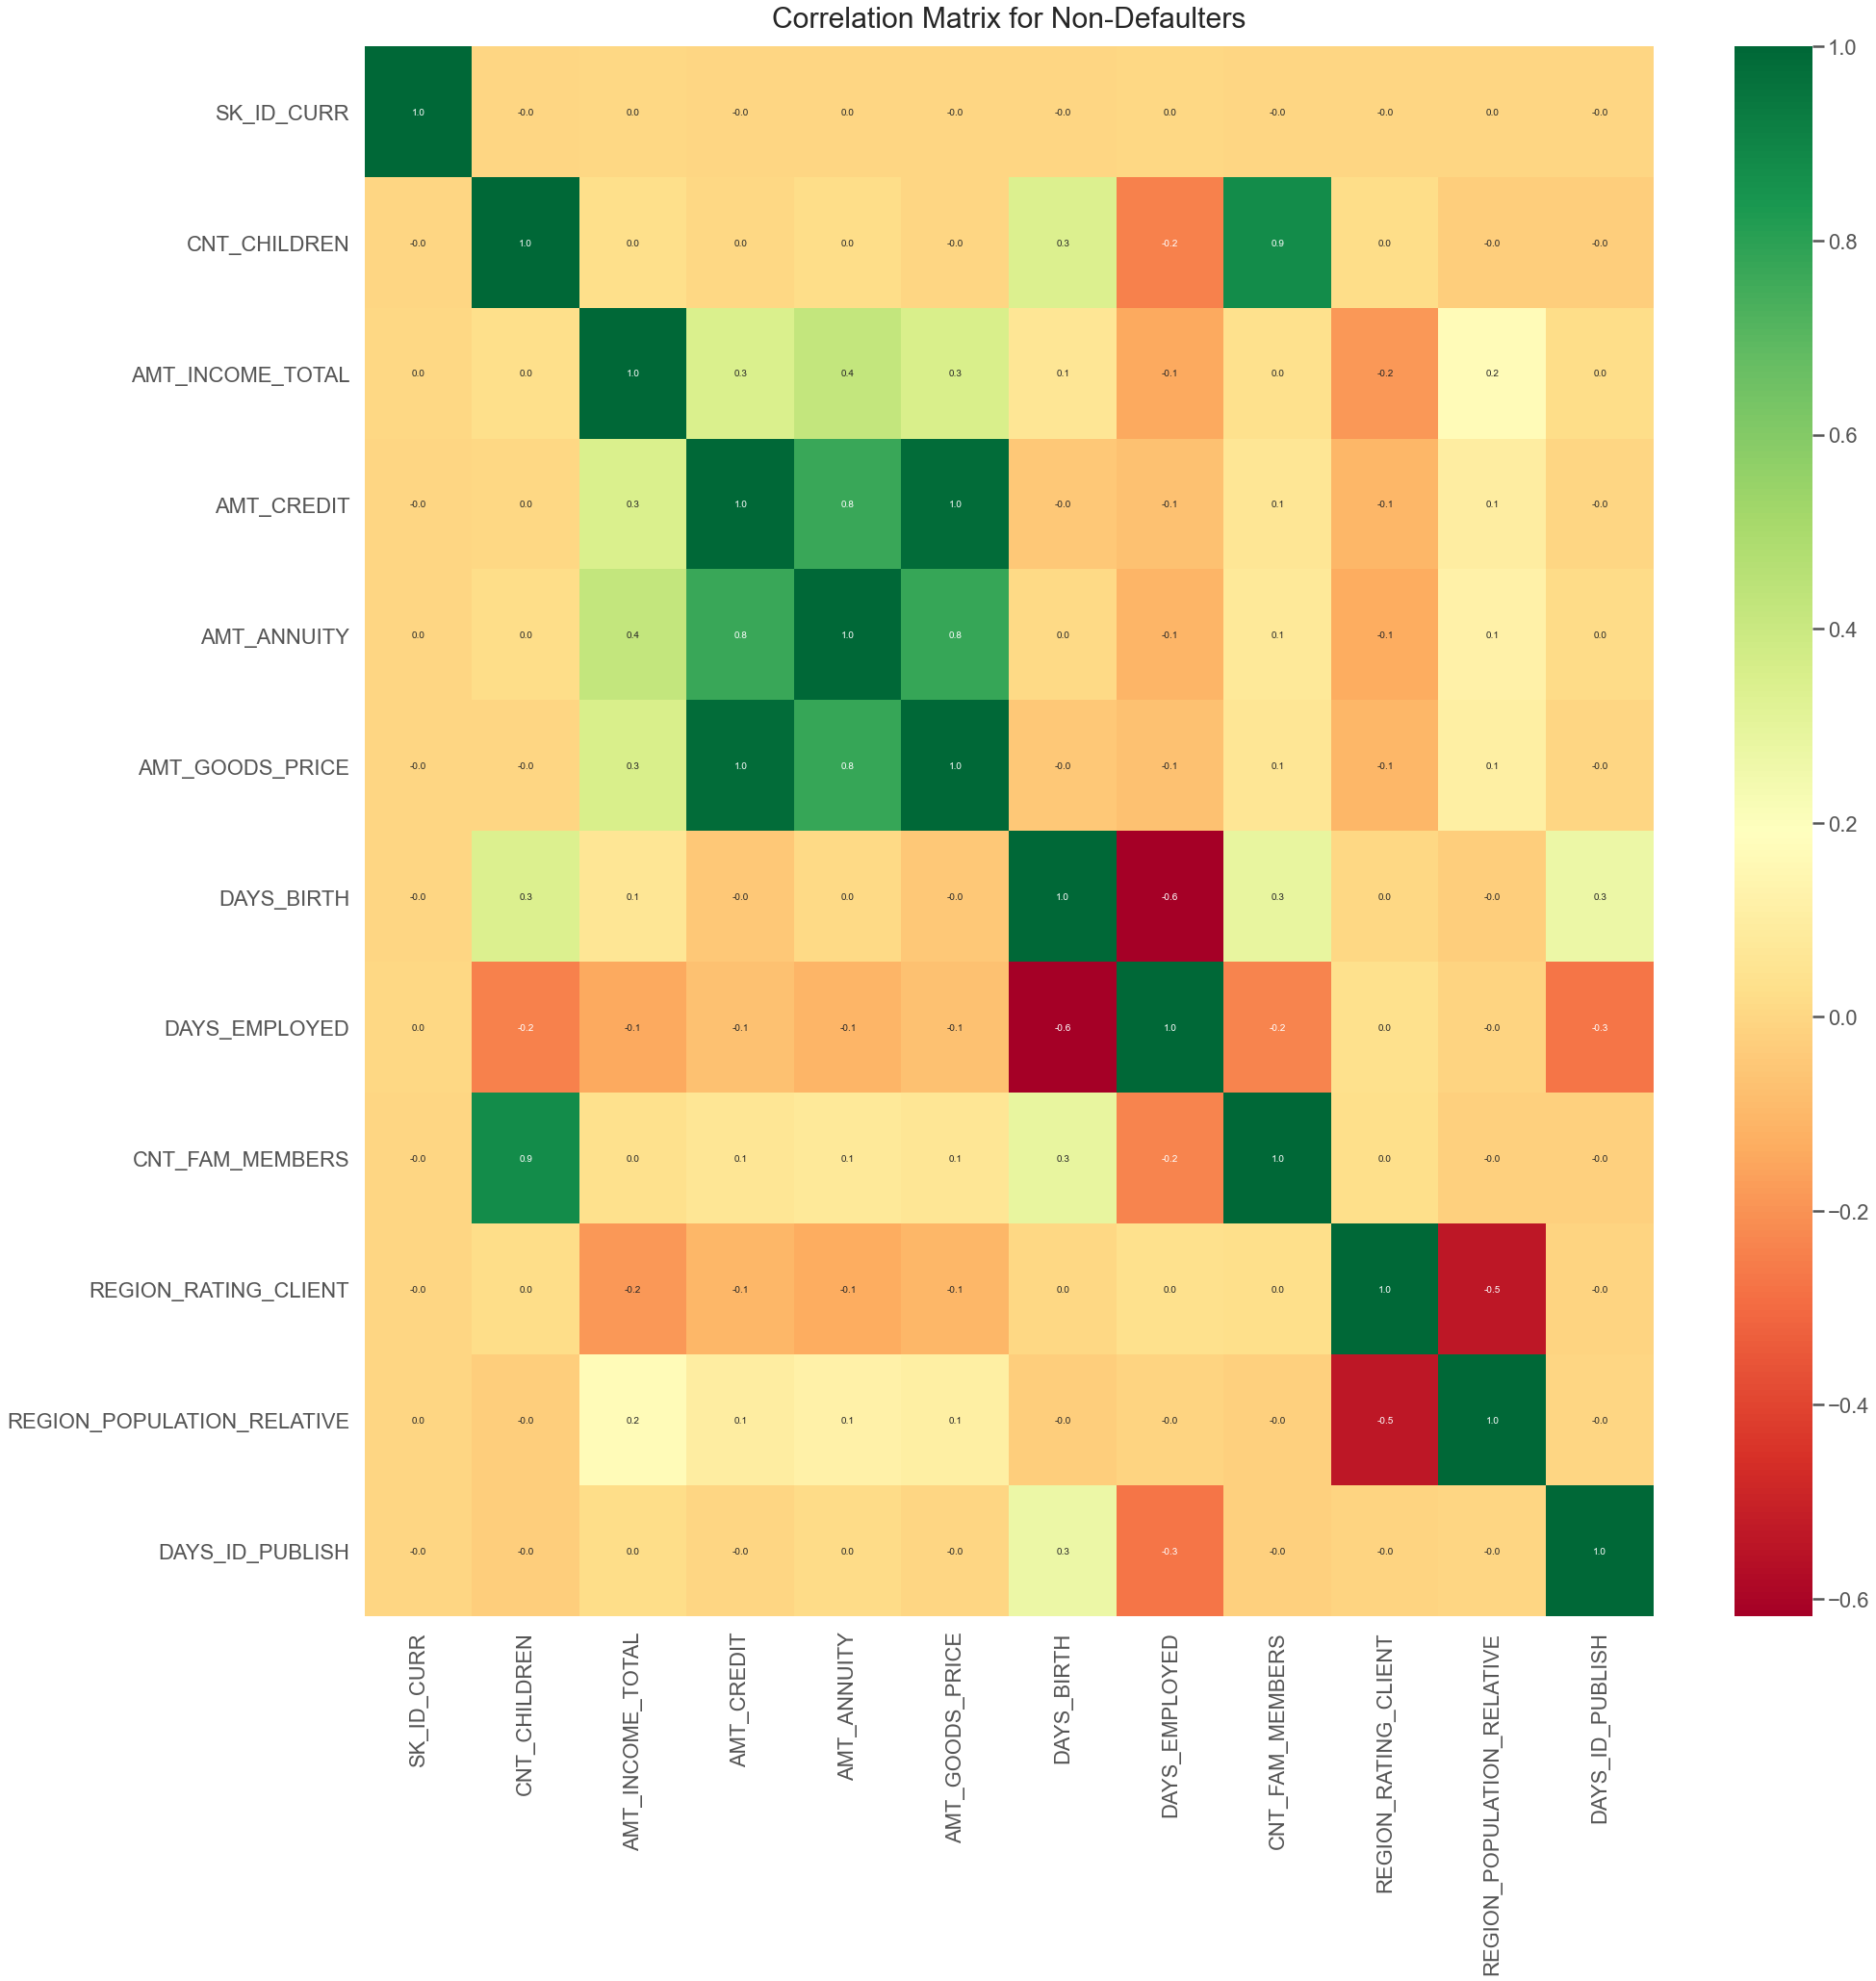

In [75]:
#Plotting Correlation matrix for Target 0 application data
d=target0[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                               'AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
                              'REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH']]

plt.figure(figsize=(30,30))
sns.heatmap(d.corr(), fmt='.1f', cmap="RdYlGn", annot=True)
plt.title("Correlation Matrix for Non-Defaulters",fontsize=30, pad=20 )
plt.show()

**Inference:**<br>These columns have high correlation values for Target 0.   
AMT_GOODS_PRICE and AMT_CREDIT<br>AMT_ANNUITY and AMT_CREDIT<br>AMT_ANNUITY and AMT_GOODS_PRICE<br>CNT_FAM_MEMBERS and CNT_CHILDREN<br>AMT_ANNUITY and AMT_INCOME_TOTAL<br>AMT_INCOME_TOTAL and AMT_GOODS_PRICE

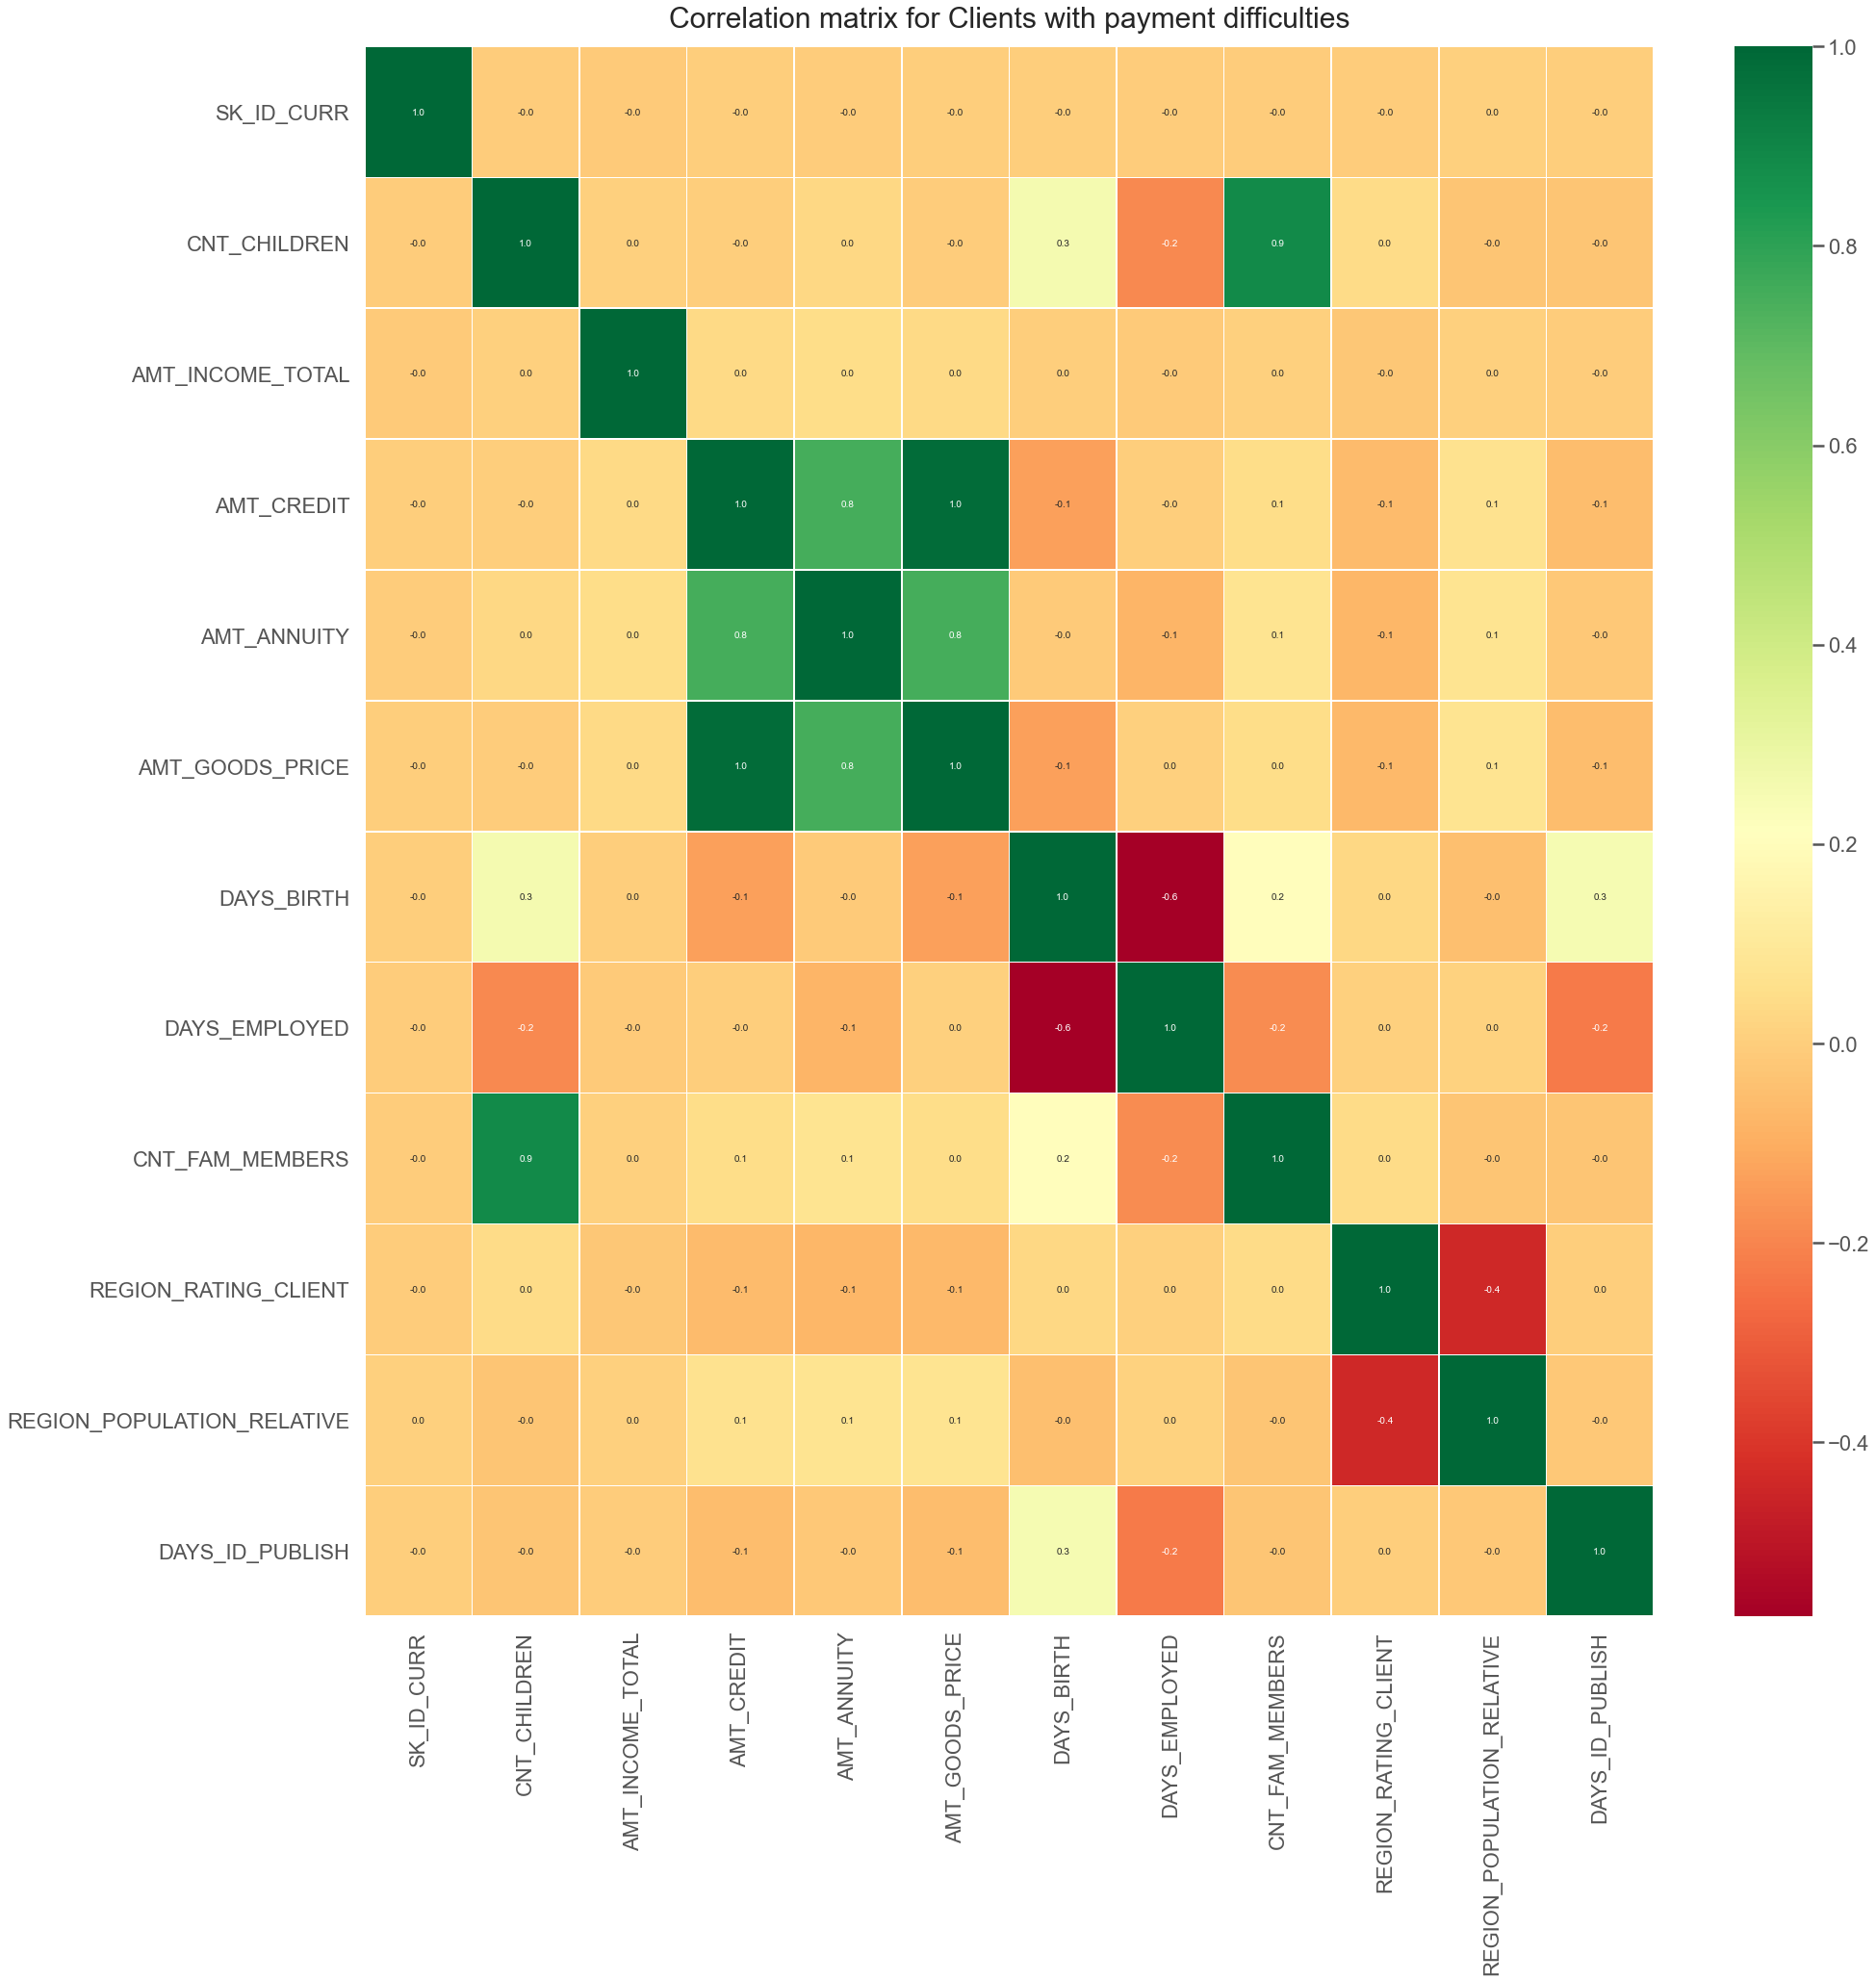

In [76]:
#Plotting Correlation matrix for Target 1 application data
d=target1[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                               'AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
                              'REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH']]
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(d.corr(), annot=True, fmt='.1f',cmap="RdYlGn", linewidths=.5, ax=ax)
plt.title("Correlation matrix for Clients with payment difficulties",fontsize=30, pad=20 )
plt.show()

**Inference:<br>**Both for Target 0 and Target 1 below columns have high correlation values:-<br><br>
AMT_GOODS_PRICE and AMT_CREDIT<br>AMT_ANNUITY and AMT_CREDIT<br>AMT_ANNUITY and AMT_GOODS_PRICE<br>CNT_FAM_MEMBER and CNT_CHILDREN<br>AMT_ANNUITY and AMT_INCOME_TOTAL<br>AMT_INCOME_TOTAL and AMT_GOODS_PRICE

In [77]:
# function for scatter plot for continuous variables
def plotscat(var1,var2):

    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.scatterplot(x=var1, y=var2,data=target0,ax=ax1)
    ax1.set_xlabel(var1)    
    ax1.set_ylabel(var2)
    ax1.set_title(f'{var1} vs {var2} for Non-Defaulters',fontsize=15)
    
    sns.scatterplot(x=var1, y=var2,data=target1,ax=ax2)
    ax2.set_xlabel(var1)    
    ax2.set_ylabel(var2)
    ax2.set_title(f'{var1} vs {var2} for Defaulters',fontsize=15)
            
    plt.show()

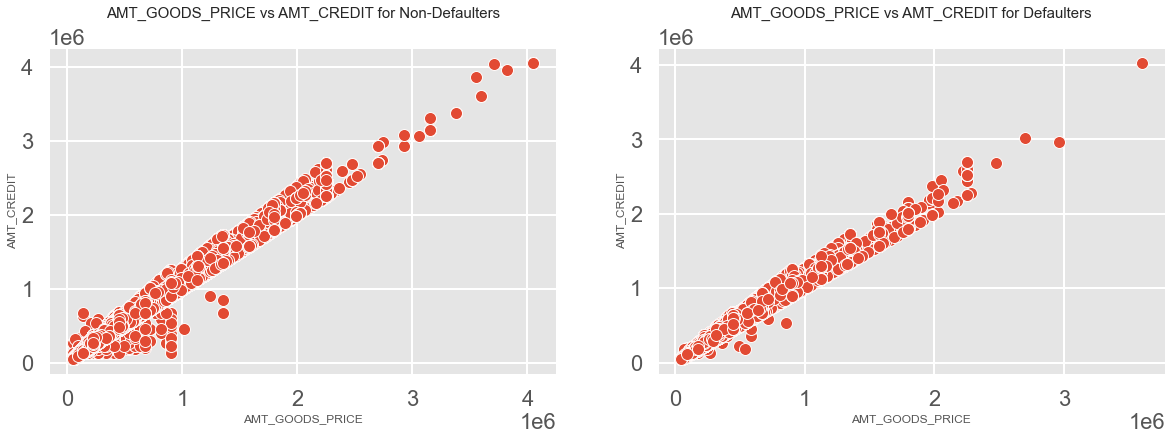

In [78]:
plotscat('AMT_GOODS_PRICE', 'AMT_CREDIT')

**Inference:**   
1. Credit amount and the Amount goods price are more correlated with the Defaulters.   
2. The Defaulters are linearly increasing as these both variable increases.

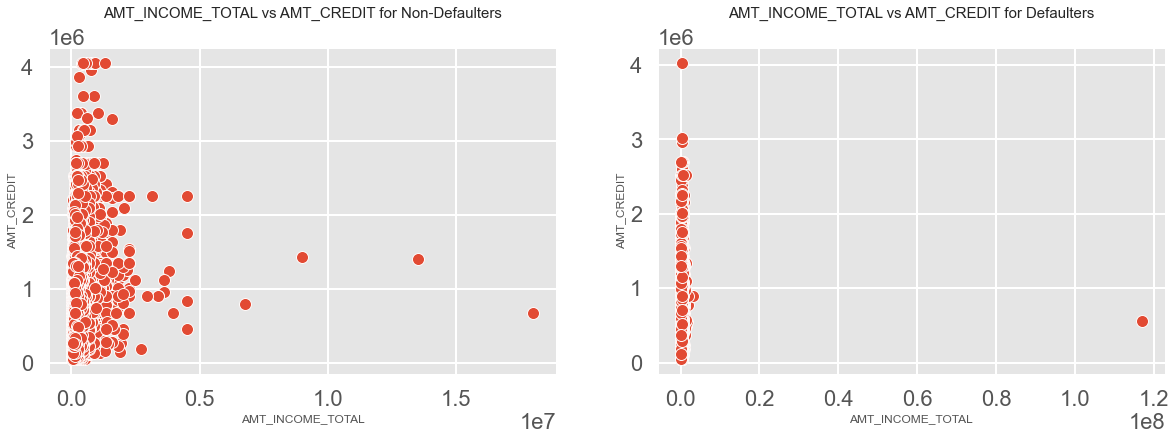

In [79]:
plotscat('AMT_INCOME_TOTAL', 'AMT_CREDIT')

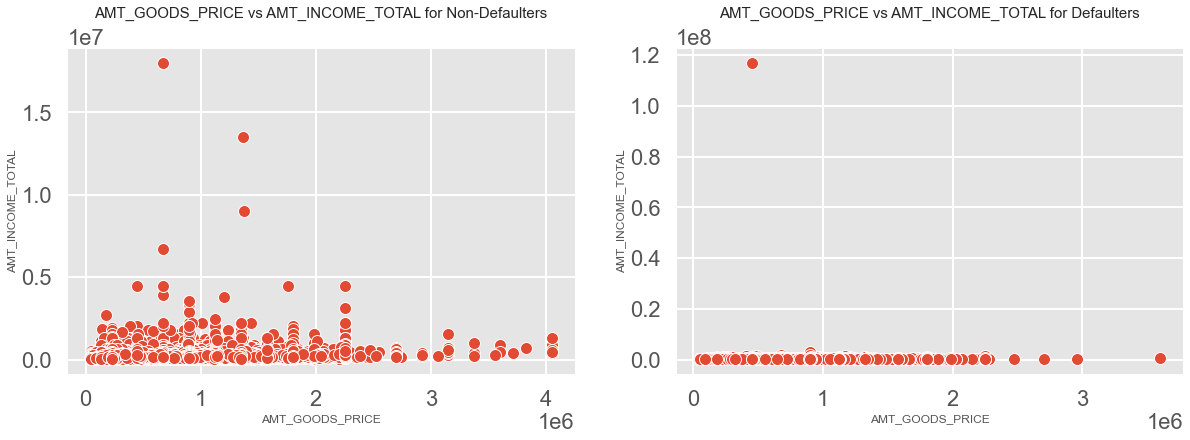

In [80]:
plotscat('AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL')

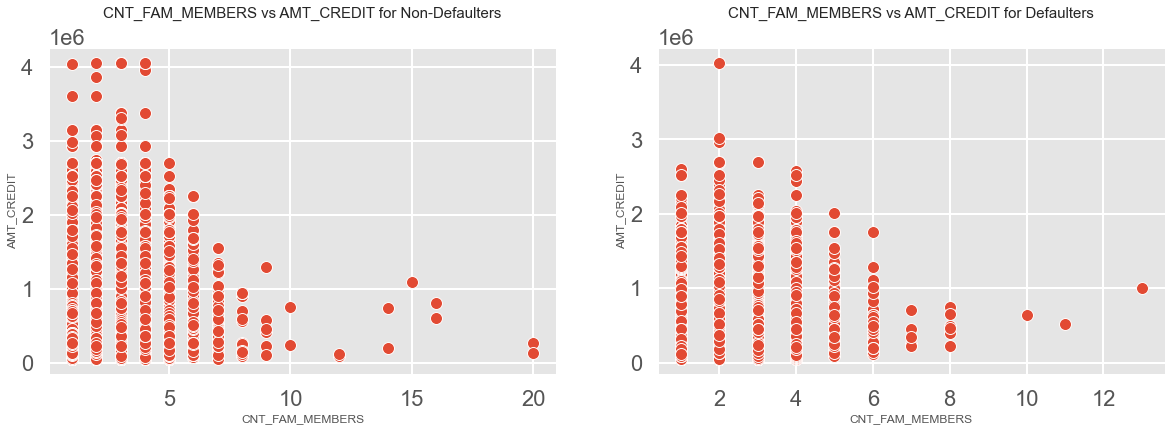

In [81]:
plotscat('CNT_FAM_MEMBERS', 'AMT_CREDIT')

**Inference:**   
Based on the absence of plots on the top left and bottom right corners, we can infer that larger families default less often. 

## Education Related Analysis

### 1. Analysis of Credit amount with respect to Education status

Text(0.5, 1.0, 'Credit Amount vs Education Status For Target 0')

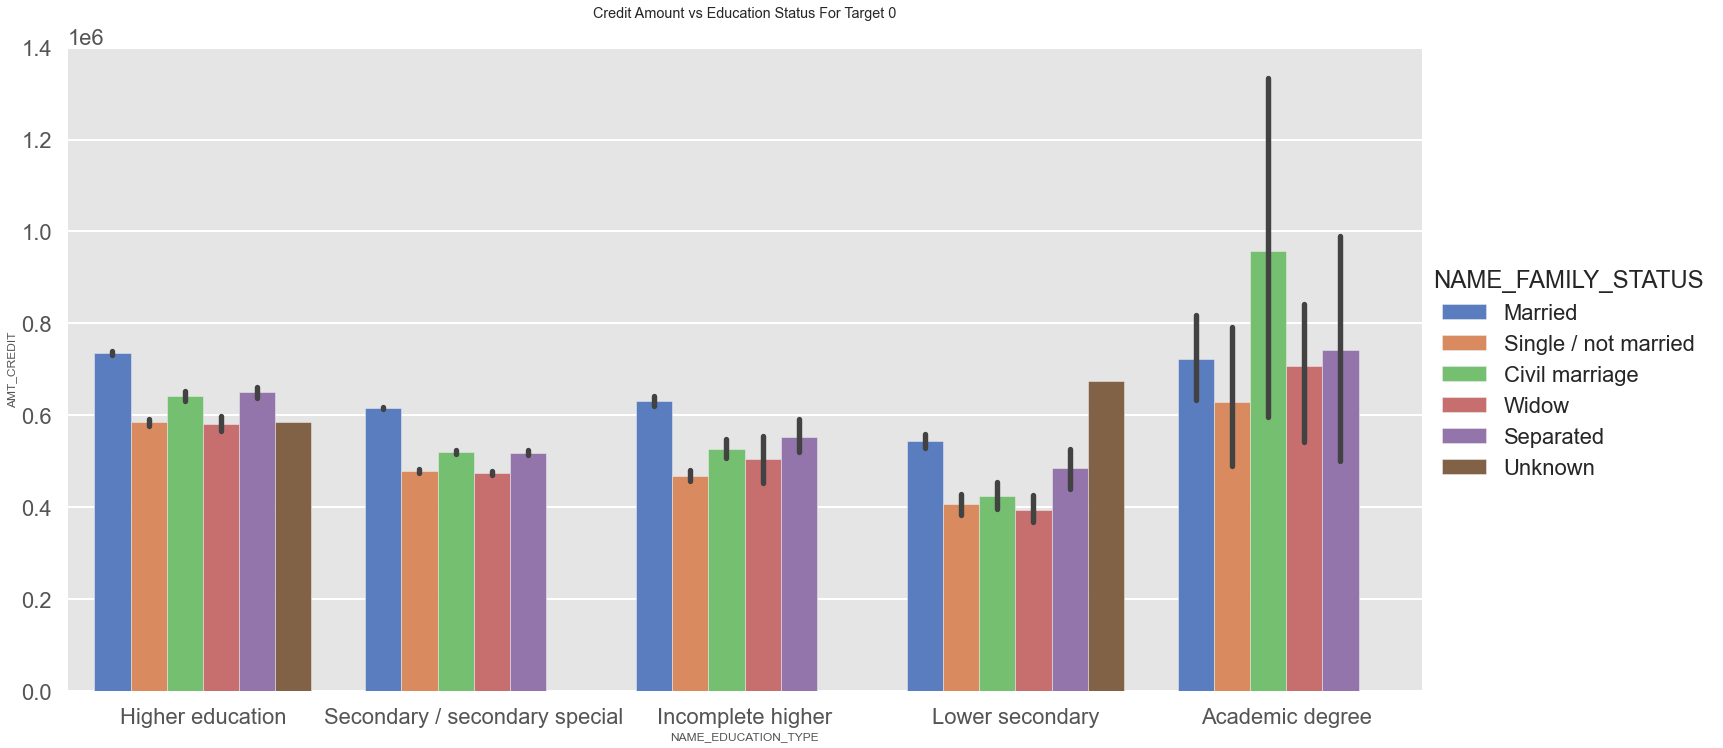

In [82]:
#Ploting NAME_EDUCATION_TYPE vs AMT_CREDIT for each family status for Target 0
sns.catplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',height=10,aspect=2, kind="bar", palette="muted")
plt.title('Credit Amount vs Education Status For Target 0')

**Inferences:**      
1. Customers holding academic degree got greater credit amount, Civil marriage segment being the highest among them.   
2. Lower educated customers got lower credit amount, Widows being the lowest among them.   
3. Married customers in almost all education segment except lower secondary and academic degrees have a higher credit amount.

Text(0.5, 1.0, 'Credit Amount vs Education Status for Target 1')

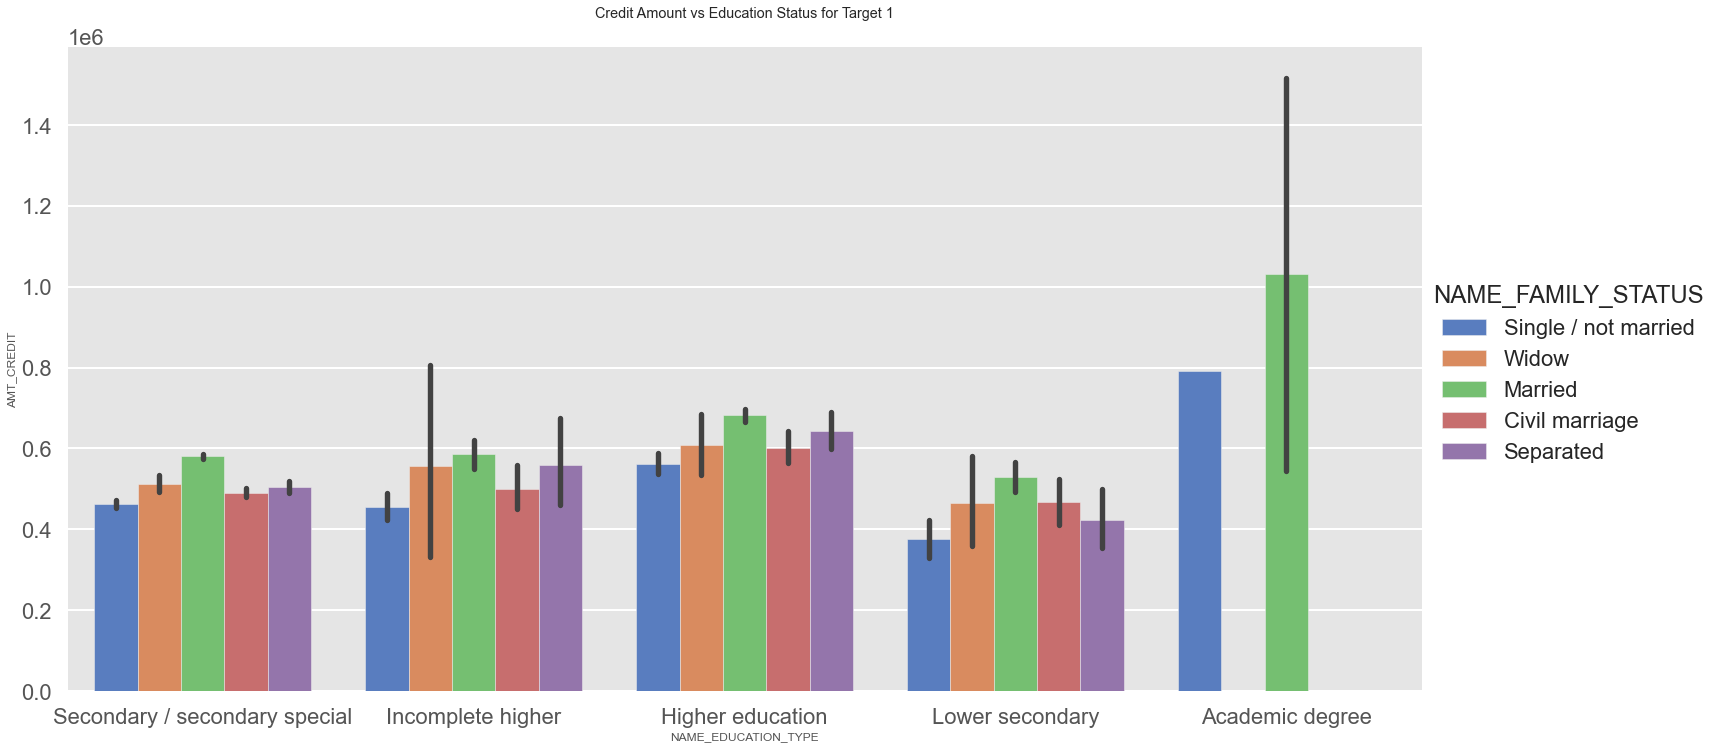

In [83]:
#Ploting NAME_EDUCATION_TYPE vs AMT_CREDIT for each family status for target 1
sns.catplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',height=10,aspect=2, kind="bar", palette="muted")
plt.title('Credit Amount vs Education Status for Target 1')

**Inferences:**     
1. Married Academic degree holding customers generally have a higher credit amount and so their defaulting rate is also high.   
2. Accross all education segment married customer tends to have higher credit amount.   
3. Customers holding lower eductation tends to have a lower credit amount.   
4. Single and Married are the only 2 family types present in academic degree .   

### 2. Analysis of Income amount with respect to Education Status

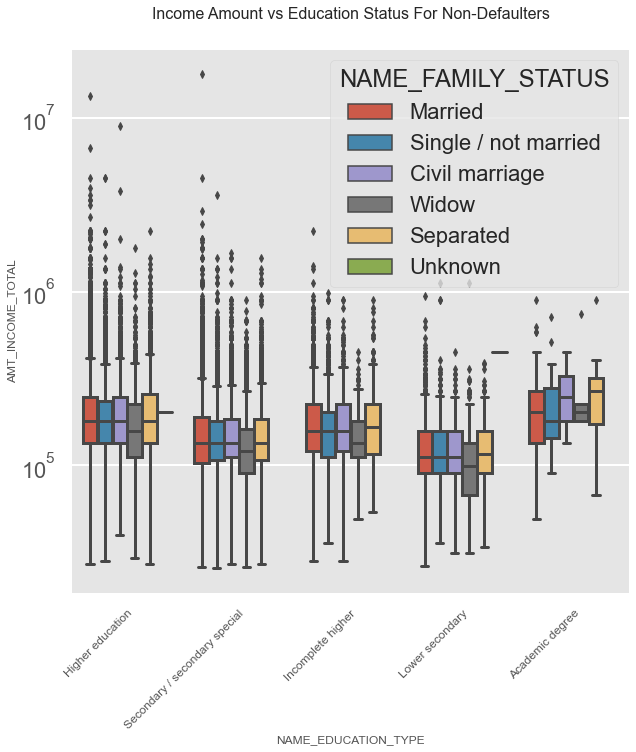

In [84]:
#Box plotting for Income amount vs Education Status for Target 0 in logarithmic scale

import textwrap
plt.figure(figsize=(10,10))
plt.xticks(rotation=45,ha="right",rotation_mode="anchor",fontsize=12)
plt.yscale('log')
g1=sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income Amount vs Education Status For Non-Defaulters',fontsize=16)
plt.show()

**Inferences:**   
1. For Education type 'Higher education' the income amount mean is mostly equal with family status. It does contain many outliers.   
2. Less outlier are having for Academic degree but they are having the income amount is little higher that Higher education.   
3. Lower secondary of civil marriage family status are have less income amount than others.

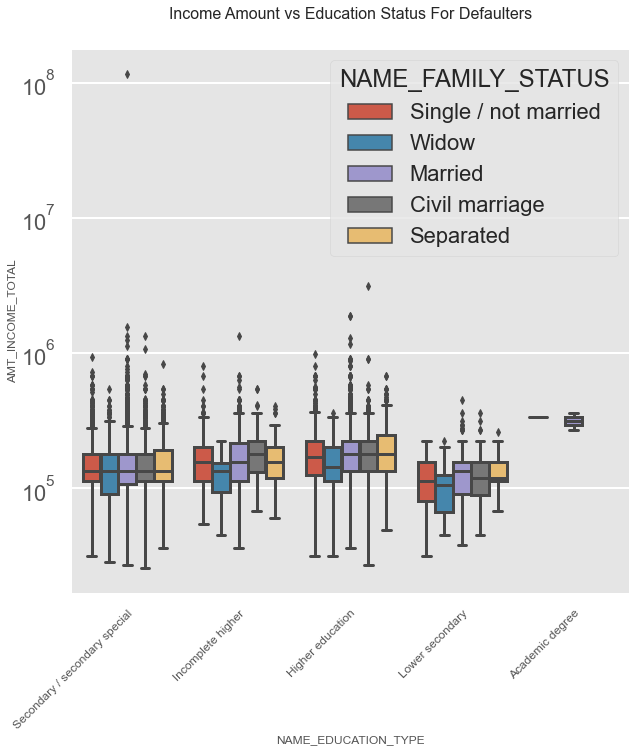

In [85]:
#Box plotting for Income amount vs Education Status for Target 1 in logarithmic scale

plt.figure(figsize=(10,10))
plt.xticks(rotation=45,ha="right",rotation_mode="anchor",fontsize=12)
plt.yscale('log')
sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income Amount vs Education Status For Defaulters',fontsize=16)
plt.show()

**Inferences:**    
1. Have some similarity with Target0, from above boxplot for Education type 'Higher education' the income amount is mostly equal with family status.   
2. No outlier for Academic degree but their income amount is little higher than that Higher education.    
3. Lower secondary are having less income amount than others.

## Import the data from previous_application

In [86]:
#Read the dataset of "application_data" in df_prev dataframe
df_prev=pd.read_csv("previous_application.csv")

In [87]:
#Display the first 5 records
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
#Check shape of the dataframe
df_prev.shape

(1670214, 37)

In [89]:
#Check info of the dataframe
df_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [90]:
#Check datatypes of each field in dataframe
df_prev.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [91]:
#Cleaning the missing data and listing the null values columns having more than 50%

emptycol1=df_prev.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.5*len(emptycol1))]
len(emptycol1)

15

In [92]:
#Removing those 15 columns

emptycol1 = list(emptycol1[emptycol1.values>=0.5].index)
df_prev.drop(labels=emptycol1,axis=1,inplace=True)
df_prev.shape

(1670214, 22)

In [93]:
#Removing the column values of 'XNA' and 'XAP'
df_prev=df_prev.drop(df_prev[df_prev['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df_prev=df_prev.drop(df_prev[df_prev['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)
df_prev.shape

(69635, 22)

In [94]:
#Merging the Application dataset with previous appliaction dataset
Merged_data=pd.merge(left=df_new,right=df_prev,how='inner',on='SK_ID_CURR',suffixes='_x')

In [95]:
Merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP,YEARS_EMPLOYED,YEARS_EMPLOYED_GROUP,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,CREDIT_INCOME_RATIO,AMT_INCOME_RANGE2,AMT_CREDIT_RANGE2,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_APPLICATION,AMT_CREDITx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,-10341,-1010,-4799.0,-3015,1,1,0,1,0,0,Laborers,1.0,2,2,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.502779,NaN,0.9831,0.3333,0.9831,0.3333,0.9831,0.3333,0.1227,No,0.0,0.0,0.0,0.0,-599.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,28,"(25, 30]",2,1-5,"75000,100000",150000-200000,2.0,0-100000,0-200000,1390369,Cash loans,94500.0,109971.0,FRIDAY,11,Y,1,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,-5266.0,-3787,1,1,0,1,0,1,NaN,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.410103,0.9697,0.0417,0.9697,0.0417,0.9697,0.0417,0.0117,No,0.0,0.0,0.0,0.0,-1634.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0,41,"(40, 45]",7,5-10,275000-300000,650000-700000,2.0,200000-300000,600000-800000,1344613,Cash loans,1260000.0,1260000.0,WEDNESDAY,14,Y,1,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-11694,-2060,-3557.0,-3557,1,1,0,1,0,0,Drivers,3.0,2,2,THURSDAY,10,0,0,0,1,1,0,Self-employed,0.321745,0.411849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-697.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,32,"(30, 35]",5,1-5,350000-375000,700000-750000,2.0,300000-400000,600000-800000,1077565,Cash loans,1350000.0,1487214.0,MONDAY,14,Y,1,Buying a used car,Approved,-695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of 

In [96]:
#Renaming the column names after merging
Merged_data = Merged_data.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [97]:
#Removing unwanted columns for analysis
Merged_data.drop(['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [98]:
#Check shape of the Merged Data
Merged_data.shape

(59413, 99)

## Performing Univariate Analysis

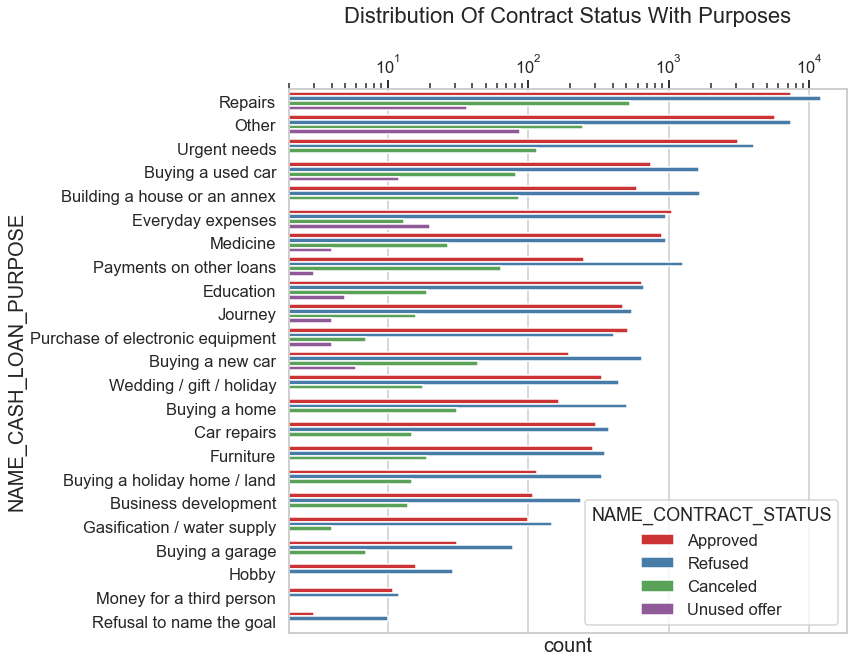

In [99]:
#Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(10,10))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.title('Distribution Of Contract Status With Purposes')
plt.xscale('log')

ax = sns.countplot(data = Merged_data, y= 'NAME_CASH_LOAN_PURPOSE',orient="h",
                   order=Merged_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue= 'NAME_CONTRACT_STATUS',palette='Set1') 
ax.xaxis.tick_top()

**Inferences:**   
1. Most rejection and approval of loans came from purpose 'Repairs'.      
2. We have almost equal number of approves and rejection for Medicine, Every day expenses and Education purposes.   
3. The number of rejections is always more than approvals except in the case of purchase of electronic equipment.

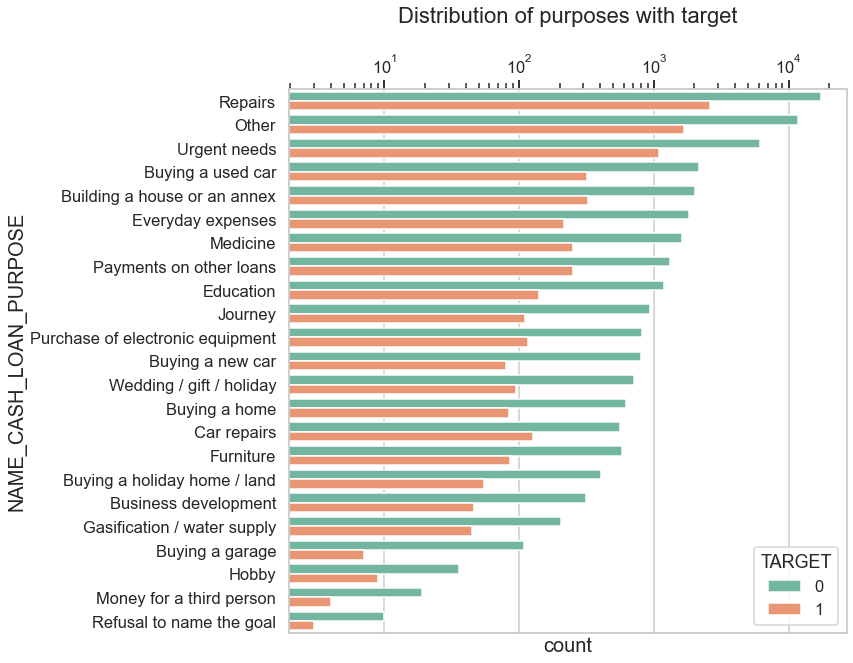

In [100]:
#Distribution of purposes with target

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(10,10))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xscale('log')
plt.title('Distribution of purposes with target')
ax = sns.countplot(data = Merged_data, y= 'NAME_CASH_LOAN_PURPOSE',orient="h",
                   order=Merged_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue= 'TARGET',palette='Set2') 
ax.xaxis.tick_top()

**Inference:**   
Loan purposes with 'Buying a new car' are facing more difficulites in payment on time.

### Performing Bivariate Analysis

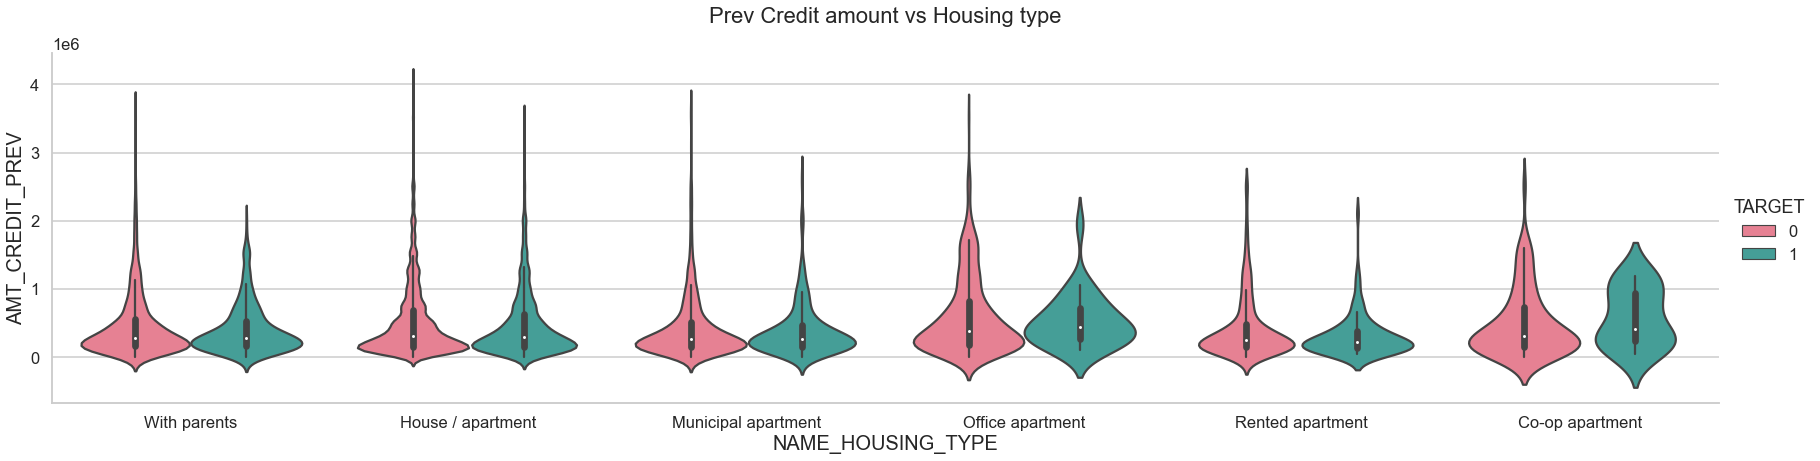

In [101]:
#Box plotting for Credit amount prev vs Housing type in logarithmic scale
sns.catplot(x="NAME_HOUSING_TYPE", y="AMT_CREDIT_PREV", hue="TARGET", data=Merged_data, kind="violin",height=6,aspect=4,palette='husl')
plt.title('Prev Credit amount vs Housing type')
plt.show()

**Inference:**<br>
The housing type of co-op apartment are having the most difficulties in payment.

<Figure size 1440x576 with 0 Axes>

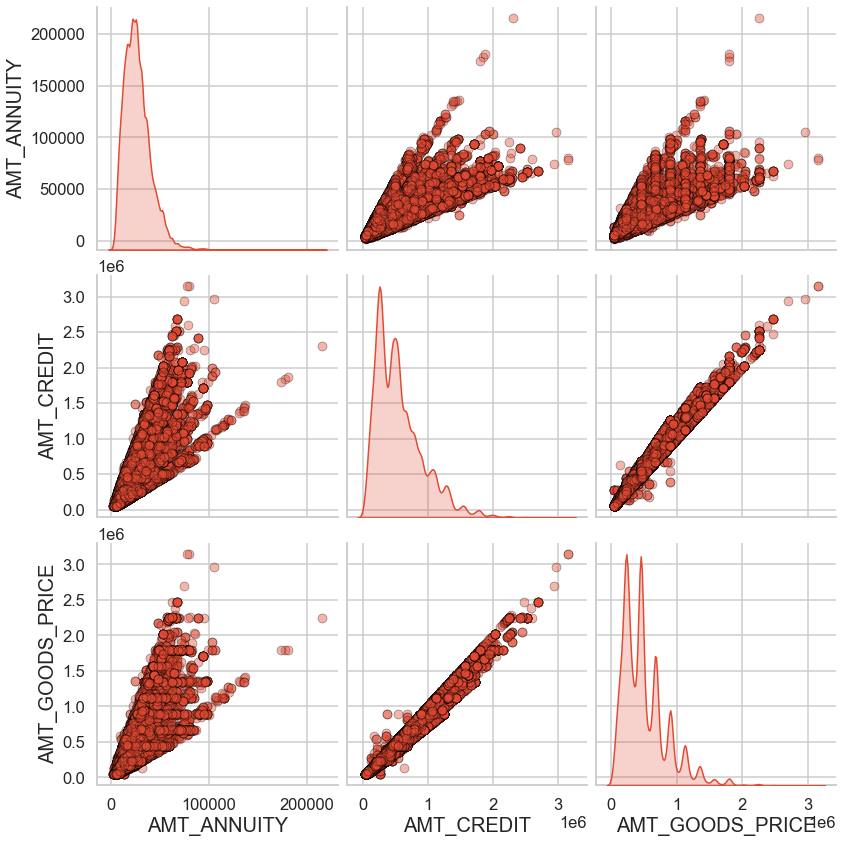

In [102]:
plt.figure(figsize=[20,8])
sns.pairplot(Merged_data[['AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE']], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

**Inferences:**   
1. Credit amount is highly influenced by Price of goods, with only few cases where credit amount is higher than that of the goods price.    
2. Increase in Annuity increases credit amount.

-----------------------------------------------------------------------------------------Thank You-----------------------------------------------------------------------------------------------------------